# Assignment 2


#### 1. 复习上课内容以及复现课程代码

在本部分，你需要在复习上课内容和课程代码后，复现课程代码。 

#### 2. 回答以下理论题目

###       < 评阅点 >： 答案是否正确完整

###### 2.1 What conditions are required to make the BFS return the optimal solution ?

Every cost between two nodes >=0    

Sort the list in every iteration

##### 2.2 Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)

Never

##### 2.3 In what conditions BFS is a better choice than DFS and vice versa ?

In optimality condition

When there is no need to consider optimality 

There must be considering space complexity

##### 2.4 When can we use machine learning ?

regression and classification

##### 2.5 What is the gradient of a function ?

对于多元函数来说，梯度是函数在该点处方向导数取得最大值，即函数沿该方向导数方向变化最快

##### 2.6 How can we find the maximum value of a function using the information of gradient ?

给定学习率，随机初始点，求得梯度函数，每次迭代后，若梯度为0，即求得极值

#### 3. 实践部分  寻找地铁路线

### < 评阅点 >  1: 爬虫爬取数据是否完整;  2:搜索算法是否正确

In this part, although we recommend you to use Beijing subway, you still can use the subway map of any cities that you are interested in. 

![title](img/ditu.png)

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system.

Deadline: 2019-October-27

#### Procedures

#### 1. Get data from web.  

Some tips: 

a. You might need this package: requests[https://2.python-requests.org/en/master/] to get webpages

b.You might need to use Regular Expression and Beautiful Soap package to parse the webpages

In [154]:
import requests
from bs4 import BeautifulSoup
import os
import re

In [155]:
url = 'https://www.bjsubway.com/station/zjgls/#'
os.makedirs('BJsubway', exist_ok = True)
r = requests.get(url,auth = ('user','pass'))
r.encoding = 'gbk'

In [156]:
html = r.text

In [157]:
soup = BeautifulSoup(html,features= 'lxml')

In [5]:
line = []
for i in range(18):
    temp = soup.find_all('li',{'id':i})
    line +=temp

In [406]:
line

[<li class="current0" id="0" onclick="doClick(this)"><a href="#">1号线</a></li>,
 <li class="" id="1" onclick="doClick(this)"><a href="#">2号线</a></li>,
 <li class="" id="2" onclick="doClick(this)"><a href="#">4号线</a></li>,
 <li class="" id="3" onclick="doClick(this)"><a href="#">5号线</a></li>,
 <li class="" id="4" onclick="doClick(this)"><a href="#">6号线</a></li>,
 <li class="" id="5" onclick="doClick(this)"><a href="#">8号线</a></li>,
 <li class="" id="6" onclick="doClick(this)"><a href="#">9号线</a></li>,
 <li class="" id="7" onclick="doClick(this)"><a href="#">10号线</a></li>,
 <li class="" id="8" onclick="doClick(this)"><a href="#">13号线</a></li>,
 <li class="" id="9" onclick="doClick(this)"><a href="#">14号线</a></li>,
 <li class="" id="10" onclick="doClick(this)"><a href="#">15号线</a></li>,
 <li class="" id="11" onclick="doClick(this)"><a href="#">八通线</a></li>,
 <li class="" id="12" onclick="doClick(this)"><a href="#">昌平线</a></li>,
 <li class="" id="13" onclick="doClick(this)"><a href="#">亦庄线<

In [6]:
#得到每条路线表格名称
def get_line_name():
    line= []
    for i in range(5,8):
        temp = soup.find_all('td',{'colspan':str(i)})
        line += temp
    return line

In [7]:
def get_line_tabel_name():
    line_tabel = []
    for each in get_line_name():
        temp = re.findall(r'>(.*?)<',str(each))
        line_tabel += temp
    return line_tabel
get_line_tabel_name()

['1号线相邻站间距信息统计表',
 '5号线相邻站间距信息统计表',
 '6号线相邻站间距信息统计表',
 '7号线相邻站间距信息统计表',
 '8号线相邻站间距信息统计表',
 '9号线相邻站间距信息统计表',
 '八通线相邻站间距信息统计表',
 '亦庄线相邻站间距信息统计表',
 '房山线相邻站间距信息统计表',
 '机场线相邻站间距信息统计表',
 '15号线相邻站间距信息统计表',
 '昌平线相邻站间距信息统计表',
 '2号线相邻站间距信息统计表',
 '4号线相邻站间距信息统计表',
 '13号线相邻站间距信息统计表',
 '14号线(西段)相邻站间距信息统计表',
 '14号线（东段）相邻站间距信息统计表',
 '大兴线相邻站间距信息统计表']

In [8]:
station = soup.find_all('tbody')

In [9]:
station

[<tbody>
 <tr>
 <th>苹果园——古城</th>
 <td width="146">2606</td>
 <td width="148">上行/下行</td>
 </tr>
 <tr>
 <th>古城——八角游乐园</th>
 <td>1921</td>
 <td>上行/下行</td>
 </tr>
 <tr>
 <th>八角游乐园——八宝山</th>
 <td>1953</td>
 <td>上行/下行</td>
 </tr>
 <tr>
 <th>八宝山——玉泉路</th>
 <td>1479</td>
 <td>上行/下行</td>
 </tr>
 <tr>
 <th>玉泉路——五棵松</th>
 <td>1810</td>
 <td>上行/下行</td>
 </tr>
 <tr>
 <th>五棵松——万寿路</th>
 <td>1778</td>
 <td>上行/下行</td>
 </tr>
 <tr>
 <th>万寿路——公主坟</th>
 <td>1313</td>
 <td>上行/下行</td>
 </tr>
 <tr>
 <th>公主坟——军事博物馆</th>
 <td>1172</td>
 <td>上行/下行</td>
 </tr>
 <tr>
 <th>军事博物馆——木樨地</th>
 <td>1166</td>
 <td>上行/下行</td>
 </tr>
 <tr>
 <th>木樨地——南礼士路</th>
 <td>1291</td>
 <td>上行/下行</td>
 </tr>
 <tr>
 <th>南礼士路——复兴门</th>
 <td>424</td>
 <td>上行/下行</td>
 </tr>
 <tr>
 <th>复兴门——西单</th>
 <td>1590</td>
 <td>上行/下行</td>
 </tr>
 <tr>
 <th>西单——天安门西</th>
 <td>1217</td>
 <td>上行/下行</td>
 </tr>
 <tr>
 <th>天安门西——天安门东</th>
 <td>925</td>
 <td>上行/下行</td>
 </tr>
 <tr>
 <th>天安门东——王府井</th>
 <td>852</td>
 <td>上行/下行</td>
 </tr>
 <tr>
 <th>王府井—

In [10]:
def get_station():
    station_list = []
    for each in station:
        temp = re.findall(r'>(.*?)<',str(each))
        station_list += temp
    return station_list

In [11]:
station_info = get_station()

In [12]:
station_info

['苹果园——古城',
 '2606',
 '上行/下行',
 '古城——八角游乐园',
 '1921',
 '上行/下行',
 '八角游乐园——八宝山',
 '1953',
 '上行/下行',
 '八宝山——玉泉路',
 '1479',
 '上行/下行',
 '玉泉路——五棵松',
 '1810',
 '上行/下行',
 '五棵松——万寿路',
 '1778',
 '上行/下行',
 '万寿路——公主坟',
 '1313',
 '上行/下行',
 '公主坟——军事博物馆',
 '1172',
 '上行/下行',
 '军事博物馆——木樨地',
 '1166',
 '上行/下行',
 '木樨地——南礼士路',
 '1291',
 '上行/下行',
 '南礼士路——复兴门',
 '424',
 '上行/下行',
 '复兴门——西单',
 '1590',
 '上行/下行',
 '西单——天安门西',
 '1217',
 '上行/下行',
 '天安门西——天安门东',
 '925',
 '上行/下行',
 '天安门东——王府井',
 '852',
 '上行/下行',
 '王府井——东单',
 '774',
 '上行/下行',
 '东单——建国门',
 '1230',
 '上行/下行',
 '建国门——永安里',
 '1377',
 '上行/下行',
 '永安里——国贸',
 '790',
 '上行/下行',
 '国贸——大望路',
 '1385',
 '上行/下行',
 '大望路——四惠',
 '1673',
 '上行/下行',
 '四惠——四惠东',
 '1714',
 '上行/下行',
 '西直门——车公庄',
 '909',
 '上行/下行',
 '车公庄——阜成门',
 '960',
 '上行/下行',
 '阜成门——复兴门',
 '1832',
 '上行/下行',
 '复兴门——长椿街',
 '1234',
 '上行/下行',
 '长椿街——宣武门',
 '929',
 '上行/下行',
 '宣武门——和平门',
 '851',
 '上行/下行',
 '和平门——前门',
 '1171',
 '上行/下行',
 '前门——崇文门',
 '1634',
 '上行/下行',
 '崇文门——北京站',
 '1023',
 '上行/下行',
 '北京站——建国门',
 '

In [13]:
with open('./BJsubway/bjsubway.csv','w') as f:
    for each_line in station_info:
        if each_line == '上行/下行' or each_line == '上行' or each_line == '下行':
            f.write(each_line + '\n')
        else:
            f.write(each_line + ',')

In [14]:
#以上爬虫未爬取地铁经纬度信息
#以下利用百度API爬取各站点经纬度信息
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import urllib.parse as urp
from xml.etree import ElementTree
import re 
import time
import json

In [635]:
with open('./BJsubway/bjsubway.csv','r') as f:
    content = f.read()
    station_names = re.findall(r'(.*?)——(.*?),',str(content))

In [636]:
station_names

[('苹果园', '古城'),
 ('古城', '八角游乐园'),
 ('八角游乐园', '八宝山'),
 ('八宝山', '玉泉路'),
 ('玉泉路', '五棵松'),
 ('五棵松', '万寿路'),
 ('万寿路', '公主坟'),
 ('公主坟', '军事博物馆'),
 ('军事博物馆', '木樨地'),
 ('木樨地', '南礼士路'),
 ('南礼士路', '复兴门'),
 ('复兴门', '西单'),
 ('西单', '天安门西'),
 ('天安门西', '天安门东'),
 ('天安门东', '王府井'),
 ('王府井', '东单'),
 ('东单', '建国门'),
 ('建国门', '永安里'),
 ('永安里', '国贸'),
 ('国贸', '大望路'),
 ('大望路', '四惠'),
 ('四惠', '四惠东'),
 ('西直门', '车公庄'),
 ('车公庄', '阜成门'),
 ('阜成门', '复兴门'),
 ('复兴门', '长椿街'),
 ('长椿街', '宣武门'),
 ('宣武门', '和平门'),
 ('和平门', '前门'),
 ('前门', '崇文门'),
 ('崇文门', '北京站'),
 ('北京站', '建国门'),
 ('建国门', '朝阳门'),
 ('朝阳门', '东四十条'),
 ('东四十条', '东直门'),
 ('东直门', '雍和宫'),
 ('雍和宫', '安定门'),
 ('安定门', '鼓楼大街'),
 ('鼓楼大街', '积水潭'),
 ('积水潭', '西直门'),
 ('安河桥北', '北宫门'),
 ('北宫门', '西苑'),
 ('西苑', '圆明园'),
 ('圆明园', '北京大学东门'),
 ('北京大学东门', '中关村'),
 ('中关村', '海淀黄庄'),
 ('海淀黄庄', '人民大学'),
 ('人民大学', '魏公村'),
 ('魏公村', '国家图书馆'),
 ('国家图书馆', '动物园'),
 ('动物园', '西直门'),
 ('西直门', '新街口'),
 ('新街口', '平安里'),
 ('平安里', '西四'),
 ('西四', '灵境胡同'),
 ('灵境胡同', '西单'),
 ('西单', '宣武门'),
 ('宣武门', '菜市口'

In [690]:
station_names_new = []
for i in range(len(station_names)):
    i1 = station_names[i][0]
    i2 = station_names[i][1]
    station_names_new.append(i1)
    station_names_new.append(i2)

In [692]:
station_names_new

['苹果园',
 '古城',
 '古城',
 '八角游乐园',
 '八角游乐园',
 '八宝山',
 '八宝山',
 '玉泉路',
 '玉泉路',
 '五棵松',
 '五棵松',
 '万寿路',
 '万寿路',
 '公主坟',
 '公主坟',
 '军事博物馆',
 '军事博物馆',
 '木樨地',
 '木樨地',
 '南礼士路',
 '南礼士路',
 '复兴门',
 '复兴门',
 '西单',
 '西单',
 '天安门西',
 '天安门西',
 '天安门东',
 '天安门东',
 '王府井',
 '王府井',
 '东单',
 '东单',
 '建国门',
 '建国门',
 '永安里',
 '永安里',
 '国贸',
 '国贸',
 '大望路',
 '大望路',
 '四惠',
 '四惠',
 '四惠东',
 '西直门',
 '车公庄',
 '车公庄',
 '阜成门',
 '阜成门',
 '复兴门',
 '复兴门',
 '长椿街',
 '长椿街',
 '宣武门',
 '宣武门',
 '和平门',
 '和平门',
 '前门',
 '前门',
 '崇文门',
 '崇文门',
 '北京站',
 '北京站',
 '建国门',
 '建国门',
 '朝阳门',
 '朝阳门',
 '东四十条',
 '东四十条',
 '东直门',
 '东直门',
 '雍和宫',
 '雍和宫',
 '安定门',
 '安定门',
 '鼓楼大街',
 '鼓楼大街',
 '积水潭',
 '积水潭',
 '西直门',
 '安河桥北',
 '北宫门',
 '北宫门',
 '西苑',
 '西苑',
 '圆明园',
 '圆明园',
 '北京大学东门',
 '北京大学东门',
 '中关村',
 '中关村',
 '海淀黄庄',
 '海淀黄庄',
 '人民大学',
 '人民大学',
 '魏公村',
 '魏公村',
 '国家图书馆',
 '国家图书馆',
 '动物园',
 '动物园',
 '西直门',
 '西直门',
 '新街口',
 '新街口',
 '平安里',
 '平安里',
 '西四',
 '西四',
 '灵境胡同',
 '灵境胡同',
 '西单',
 '西单',
 '宣武门',
 '宣武门',
 '菜市口',
 '菜市口',
 '陶然亭',
 '陶然亭',
 '北京南站',
 '北京南站',
 '马家堡',
 '马家堡

In [796]:
a=['df','asdfd','ffg']
a.pop(0)
a

['asdfd', 'ffg']

In [696]:
for i in range(len(station_names_new)-1):
    if station_names_new[i] == station_names_new[i+1]:
        station_names_new.pop(i+1)

In [697]:
station_names_new

['苹果园',
 '古城',
 '八角游乐园',
 '八宝山',
 '玉泉路',
 '五棵松',
 '万寿路',
 '公主坟',
 '军事博物馆',
 '木樨地',
 '南礼士路',
 '复兴门',
 '西单',
 '天安门西',
 '天安门东',
 '王府井',
 '东单',
 '建国门',
 '永安里',
 '国贸',
 '大望路',
 '四惠',
 '四惠东',
 '西直门',
 '车公庄',
 '阜成门',
 '复兴门',
 '长椿街',
 '宣武门',
 '和平门',
 '前门',
 '崇文门',
 '北京站',
 '建国门',
 '朝阳门',
 '东四十条',
 '东直门',
 '雍和宫',
 '安定门',
 '鼓楼大街',
 '积水潭',
 '西直门',
 '安河桥北',
 '北宫门',
 '西苑',
 '圆明园',
 '北京大学东门',
 '中关村',
 '海淀黄庄',
 '人民大学',
 '魏公村',
 '国家图书馆',
 '动物园',
 '西直门',
 '新街口',
 '平安里',
 '西四',
 '灵境胡同',
 '西单',
 '宣武门',
 '菜市口',
 '陶然亭',
 '北京南站',
 '马家堡',
 '角门西',
 '公益西桥',
 '天通苑北',
 '天通苑',
 '天通苑南',
 '立水桥',
 '立水桥南',
 '北苑路北',
 '大屯路东',
 '惠新西街北口',
 '惠新西街南口',
 '和平西桥',
 '和平里北街',
 '雍和宫',
 '北新桥',
 '张自忠路',
 '东四',
 '灯市口',
 '东单',
 '崇文门',
 '磁器口',
 '天坛东门',
 '蒲黄榆',
 '刘家窑',
 '宋家庄',
 '海淀五路居',
 '慈寿寺',
 '花园桥',
 '白石桥南',
 '车公庄西',
 '车公庄',
 '平安里',
 '北海北',
 '南锣鼓巷',
 '东四',
 '朝阳门',
 '东大桥',
 '呼家楼',
 '金台路',
 '十里堡',
 '青年路',
 '褡裢坡',
 '黄渠',
 '常营',
 '草房',
 '物资学院路',
 '通州北关',
 '通运门',
 '北运河西',
 '北运河东',
 '郝家府',
 '东夏园',
 '潞城',
 '北京西站',
 '湾子',
 '达官营',
 '广安门内',
 

In [698]:
station_names_new[-3]='3号航站楼'

In [807]:
station_names_new

['苹果园',
 '古城',
 '八角游乐园',
 '八宝山',
 '玉泉路',
 '五棵松',
 '万寿路',
 '公主坟',
 '军事博物馆',
 '木樨地',
 '南礼士路',
 '复兴门',
 '西单',
 '天安门西',
 '天安门东',
 '王府井',
 '东单',
 '建国门',
 '永安里',
 '国贸',
 '大望路',
 '四惠',
 '四惠东',
 '西直门',
 '车公庄',
 '阜成门',
 '复兴门',
 '长椿街',
 '宣武门',
 '和平门',
 '前门',
 '崇文门',
 '北京站',
 '建国门',
 '朝阳门',
 '东四十条',
 '东直门',
 '雍和宫',
 '安定门',
 '鼓楼大街',
 '积水潭',
 '西直门',
 '安河桥北',
 '北宫门',
 '西苑',
 '圆明园',
 '北京大学东门',
 '中关村',
 '海淀黄庄',
 '人民大学',
 '魏公村',
 '国家图书馆',
 '动物园',
 '西直门',
 '新街口',
 '平安里',
 '西四',
 '灵境胡同',
 '西单',
 '宣武门',
 '菜市口',
 '陶然亭',
 '北京南站',
 '马家堡',
 '角门西',
 '公益西桥',
 '天通苑北',
 '天通苑',
 '天通苑南',
 '立水桥',
 '立水桥南',
 '北苑路北',
 '大屯路东',
 '惠新西街北口',
 '惠新西街南口',
 '和平西桥',
 '和平里北街',
 '雍和宫',
 '北新桥',
 '张自忠路',
 '东四',
 '灯市口',
 '东单',
 '崇文门',
 '磁器口',
 '天坛东门',
 '蒲黄榆',
 '刘家窑',
 '宋家庄',
 '海淀五路居',
 '慈寿寺',
 '花园桥',
 '白石桥南',
 '车公庄西',
 '车公庄',
 '平安里',
 '北海北',
 '南锣鼓巷',
 '东四',
 '朝阳门',
 '东大桥',
 '呼家楼',
 '金台路',
 '十里堡',
 '青年路',
 '褡裢坡',
 '黄渠',
 '常营',
 '草房',
 '物资学院路',
 '通州北关',
 '通运门',
 '北运河西',
 '北运河东',
 '郝家府',
 '东夏园',
 '潞城',
 '北京西站',
 '湾子',
 '达官营',
 '广安门内',
 

In [1154]:
station_names_new.index('天宫院')

332

In [808]:
import pandas
from bs4 import BeautifulSoup 
from urllib import request
import re
import pandas as pd
import numpy as np
import urllib.parse as urp
from xml.etree import ElementTree
import time

def __get_location1__(name,city):
        line_name_location = {}
        my_ak = 'MILrbpcKfwyXKEzttHc58N5GYDnfiDdl'    # 需要自己填写自己的AK
        tag = urp.quote('地铁站')
        qurey = urp.quote(name+'地铁站')
        try:
            url = 'http://api.map.baidu.com/place/v2/search?query='+qurey+'&tag='+tag+'&region='+urp.quote(city)+'&output=json&ak='+my_ak
            response = requests.get(url)
            #print(response.status_code)
            jsondata=response.text
            
            jsondatatopython = json.loads(jsondata)
            location = jsondatatopython['results'][0]['location']
            line_name = jsondatatopython['results'][0]['address']
            line_name_location['line'] = line_name
            line_name_location['name'] = name
            line_name_location['location'] = (location['lng'],location['lat'])
            return line_name_location
            #req = request.urlopen(url)
            #res = req.read().decode()
            #lat = pd.to_numeric(re.findall('"lat":(.*)',res)[0].split(',')[0])
            #lng = pd.to_numeric(re.findall('"lng":(.*)',res)[0])
            #line_name_0 = re.findall('"address":(.*)',res)[0].split(',')[0].split('"')[1]
            #line_name_1 = re.findall('"address":(.*)',res)[1].split(',')[0].split('"')[1]
            #line_name_2 = re.findall('"address":(.*)',res)[2].split(',')[0].split('"')[1]
            #line_name = comp(line_name_0,line_name_1,line_name_2)
            #return (lng,lat)
        except:
            return 0,0

In [809]:
__get_location1__('苹果园','北京')

{'line': '地铁1号线', 'name': '苹果园', 'location': (116.184436, 39.932436)}

In [836]:
all = []
def __get_location2__(station_names_new):
    for i in range(len(station_names_new)):
        
        station_name = station_names_new[i]
        #print(station_name)
        get_func = __get_location1__(station_name,'北京')       
        all.append(get_func)
        time.sleep(0.25)
    return all
    #except Exception as e:
      #  print('Exception in get location',e)
        #time.sleep(5)
       # return None

In [867]:
line_name_location = __get_location2__(station_names_new)

In [868]:
line_name_location

[{'line': '地铁1号线', 'name': '苹果园', 'location': (116.184436, 39.932436)},
 {'line': '地铁1号线', 'name': '古城', 'location': (116.197076, 39.913414)},
 {'line': '地铁1号线', 'name': '八角游乐园', 'location': (116.219395, 39.913076)},
 {'line': '地铁1号线', 'name': '八宝山', 'location': (116.2424, 39.913187)},
 {'line': '地铁1号线', 'name': '玉泉路', 'location': (116.259475, 39.913501)},
 {'line': '地铁1号线', 'name': '五棵松', 'location': (116.280661, 39.913834)},
 {'line': '地铁1号线', 'name': '万寿路', 'location': (116.301384, 39.913711)},
 {'line': '地铁10号线;地铁1号线', 'name': '公主坟', 'location': (116.316746, 39.913701)},
 {'line': '地铁1号线;地铁9号线', 'name': '军事博物馆', 'location': (116.329311, 39.913343)},
 {'line': '地铁1号线', 'name': '木樨地', 'location': (116.3441, 39.913125)},
 {'line': '地铁1号线', 'name': '南礼士路', 'location': (116.359177, 39.912979)},
 {'line': '地铁1号线;地铁2号线', 'name': '复兴门', 'location': (116.36376, 39.913025)},
 {'line': '地铁1号线;地铁4号线大兴线', 'name': '西单', 'location': (116.381905, 39.913327)},
 {'line': '地铁1号线', 'name': '天安门西', 'lo

In [841]:
a=[1,2]
b = list.copy(a)

In [843]:
b[0] = 100

In [844]:
b

[100, 2]

In [845]:
a

[1, 2]

In [905]:
line_name_location_copy = list.copy(line_name_location)

In [906]:
line_name_location_copy

[{'line': '地铁1号线', 'name': '苹果园', 'location': (116.184436, 39.932436)},
 {'line': '地铁1号线', 'name': '古城', 'location': (116.197076, 39.913414)},
 {'line': '地铁1号线', 'name': '八角游乐园', 'location': (116.219395, 39.913076)},
 {'line': '地铁1号线', 'name': '八宝山', 'location': (116.2424, 39.913187)},
 {'line': '地铁1号线', 'name': '玉泉路', 'location': (116.259475, 39.913501)},
 {'line': '地铁1号线', 'name': '五棵松', 'location': (116.280661, 39.913834)},
 {'line': '地铁1号线', 'name': '万寿路', 'location': (116.301384, 39.913711)},
 {'line': '地铁10号线;地铁1号线', 'name': '公主坟', 'location': (116.316746, 39.913701)},
 {'line': '地铁1号线;地铁9号线', 'name': '军事博物馆', 'location': (116.329311, 39.913343)},
 {'line': '地铁1号线', 'name': '木樨地', 'location': (116.3441, 39.913125)},
 {'line': '地铁1号线', 'name': '南礼士路', 'location': (116.359177, 39.912979)},
 {'line': '地铁1号线;地铁2号线', 'name': '复兴门', 'location': (116.36376, 39.913025)},
 {'line': '地铁1号线;地铁4号线大兴线', 'name': '西单', 'location': (116.381905, 39.913327)},
 {'line': '地铁1号线', 'name': '天安门西', 'lo

In [907]:
def get_every_line(subwayline):
    every_line_info = {}
    for i in range(len(line_name_location_copy)):
        temp = list(line_name_location_copy[i].values())
        temp_xian = temp[0]
        temp_name = temp[1]
        temp_location = temp[2]
        if subwayline in temp_xian:
            every_line_info[temp_name] = temp_location
    return every_line_info      

In [908]:
line_1 = get_every_line('地铁1号线')

In [909]:
line_1

{'苹果园': (116.184436, 39.932436),
 '古城': (116.197076, 39.913414),
 '八角游乐园': (116.219395, 39.913076),
 '八宝山': (116.2424, 39.913187),
 '玉泉路': (116.259475, 39.913501),
 '五棵松': (116.280661, 39.913834),
 '万寿路': (116.301384, 39.913711),
 '公主坟': (116.316746, 39.913701),
 '军事博物馆': (116.329311, 39.913343),
 '木樨地': (116.3441, 39.913125),
 '南礼士路': (116.359177, 39.912979),
 '复兴门': (116.36376, 39.913025),
 '西单': (116.381905, 39.913327),
 '天安门西': (116.398036, 39.913776),
 '天安门东': (116.407913, 39.914082),
 '王府井': (116.418017, 39.914402),
 '东单': (116.425374, 39.914503),
 '建国门': (116.44195, 39.914505),
 '永安里': (116.457086, 39.914223),
 '国贸': (116.467328, 39.914437),
 '大望路': (116.483555, 39.914614),
 '四惠': (116.502033, 39.914861),
 '四惠东': (116.521965, 39.914941)}

In [910]:
len(line_1)

23

In [911]:
def delect(count):
    for i in range(count):
        line_name_location_copy.pop(0)
    return line_name_location_copy

In [912]:
delect(len(line_1))

[{'line': '地铁13号线;地铁2号线;地铁4号线大兴线',
  'name': '西直门',
  'location': (116.361446, 39.946471)},
 {'line': '地铁2号线;地铁6号线', 'name': '车公庄', 'location': (116.361887, 39.938351)},
 {'line': '地铁2号线', 'name': '阜成门', 'location': (116.362817, 39.929522)},
 {'line': '地铁1号线;地铁2号线', 'name': '复兴门', 'location': (116.36376, 39.913025)},
 {'line': '地铁2号线', 'name': '长椿街', 'location': (116.369911, 39.90534)},
 {'line': '地铁2号线;地铁4号线大兴线',
  'name': '宣武门',
  'location': (116.380848, 39.905881)},
 {'line': '地铁2号线', 'name': '和平门', 'location': (116.390619, 39.906362)},
 {'line': '地铁2号线', 'name': '前门', 'location': (116.404276, 39.906534)},
 {'line': '地铁2号线;地铁5号线', 'name': '崇文门', 'location': (116.424427, 39.9072)},
 {'line': '地铁2号线', 'name': '北京站', 'location': (116.433608, 39.911127)},
 {'line': '地铁1号线;地铁2号线', 'name': '建国门', 'location': (116.44195, 39.914505)},
 {'line': '地铁2号线;地铁6号线', 'name': '朝阳门', 'location': (116.44019, 39.93046)},
 {'line': '地铁2号线', 'name': '东四十条', 'location': (116.440638, 39.939841)},
 {'line'

In [913]:
line_2 = get_every_line('地铁2号线')

In [914]:
line_2

{'西直门': (116.361446, 39.946471),
 '车公庄': (116.361887, 39.938351),
 '阜成门': (116.362817, 39.929522),
 '复兴门': (116.36376, 39.913025),
 '长椿街': (116.369911, 39.90534),
 '宣武门': (116.380848, 39.905881),
 '和平门': (116.390619, 39.906362),
 '前门': (116.404276, 39.906534),
 '崇文门': (116.424427, 39.9072),
 '北京站': (116.433608, 39.911127),
 '建国门': (116.44195, 39.914505),
 '朝阳门': (116.44019, 39.93046),
 '东四十条': (116.440638, 39.939841),
 '东直门': (116.441365, 39.947769),
 '雍和宫': (116.42312, 39.955113),
 '安定门': (116.414597, 39.955441),
 '鼓楼大街': (116.400238, 39.954611),
 '积水潭': (116.379185, 39.954765)}

In [915]:
delect(len(line_2)+1)

[{'line': '地铁4号线大兴线', 'name': '安河桥北', 'location': (116.276432, 40.018657)},
 {'line': '地铁4号线大兴线', 'name': '北宫门', 'location': (116.28399, 40.008678)},
 {'line': '地铁16号线;地铁4号线大兴线', 'name': '西苑', 'location': (116.297853, 40.0049)},
 {'line': '地铁4号线大兴线', 'name': '圆明园', 'location': (116.315938, 40.005466)},
 {'line': '地铁4号线大兴线', 'name': '北京大学东门', 'location': (116.322265, 39.998006)},
 {'line': '地铁4号线大兴线', 'name': '中关村', 'location': (116.323066, 39.989956)},
 {'line': '地铁10号线;地铁4号线大兴线',
  'name': '海淀黄庄',
  'location': (116.324346, 39.981865)},
 {'line': '地铁4号线大兴线', 'name': '人民大学', 'location': (116.32809, 39.97277)},
 {'line': '地铁4号线大兴线', 'name': '魏公村', 'location': (116.329874, 39.963457)},
 {'line': '地铁4号线大兴线;地铁9号线',
  'name': '国家图书馆',
  'location': (116.331897, 39.948864)},
 {'line': '地铁4号线大兴线', 'name': '动物园', 'location': (116.345204, 39.943923)},
 {'line': '地铁13号线;地铁2号线;地铁4号线大兴线',
  'name': '西直门',
  'location': (116.361446, 39.946471)},
 {'line': '地铁4号线大兴线', 'name': '新街口', 'location': (116

In [916]:
line_4 = get_every_line('地铁4号线')

In [917]:
line_4

{'安河桥北': (116.276432, 40.018657),
 '北宫门': (116.28399, 40.008678),
 '西苑': (116.297853, 40.0049),
 '圆明园': (116.315938, 40.005466),
 '北京大学东门': (116.322265, 39.998006),
 '中关村': (116.323066, 39.989956),
 '海淀黄庄': (116.324346, 39.981865),
 '人民大学': (116.32809, 39.97277),
 '魏公村': (116.329874, 39.963457),
 '国家图书馆': (116.331897, 39.948864),
 '动物园': (116.345204, 39.943923),
 '西直门': (116.361446, 39.946471),
 '新街口': (116.374132, 39.94658),
 '平安里': (116.378599, 39.939262),
 '西四': (116.37977, 39.930248),
 '灵境胡同': (116.380223, 39.922136),
 '西单': (116.381905, 39.913327),
 '宣武门': (116.380848, 39.905881),
 '菜市口': (116.380956, 39.895379),
 '陶然亭': (116.380902, 39.884625),
 '北京南站': (116.385629, 39.871107),
 '马家堡': (116.377878, 39.859199),
 '角门西': (116.377646, 39.851929),
 '公益西桥': (116.37729, 39.842329),
 '陶然桥': (116.380902, 39.884625),
 '新宫': (116.372097, 39.818302),
 '西红门': (116.335169, 39.795445),
 '高米店北': (116.337331, 39.779548),
 '高米店南': (116.33841, 39.769059),
 '枣园': (116.338975, 39.759079),
 '清源路': (11

In [918]:
delect(24)

[{'line': '地铁5号线', 'name': '天通苑北', 'location': (116.419385, 40.089597)},
 {'line': '地铁5号线', 'name': '天通苑', 'location': (116.419233, 40.081478)},
 {'line': '地铁5号线', 'name': '天通苑南', 'location': (116.419113, 40.072752)},
 {'line': '地铁13号线;地铁5号线', 'name': '立水桥', 'location': (116.418267, 40.059247)},
 {'line': '地铁5号线', 'name': '立水桥南', 'location': (116.420973, 40.048143)},
 {'line': '地铁5号线', 'name': '北苑路北', 'location': (116.424525, 40.036821)},
 {'line': '地铁15号线;地铁5号线', 'name': '大屯路东', 'location': (116.424567, 40.009611)},
 {'line': '地铁5号线', 'name': '惠新西街北口', 'location': (116.423532, 39.994151)},
 {'line': '地铁10号线;地铁5号线',
  'name': '惠新西街南口',
  'location': (116.424044, 39.983276)},
 {'line': '地铁5号线', 'name': '和平西桥', 'location': (116.424463, 39.974502)},
 {'line': '地铁5号线', 'name': '和平里北街', 'location': (116.425051, 39.964752)},
 {'line': '地铁2号线;地铁5号线', 'name': '雍和宫', 'location': (116.42312, 39.955113)},
 {'line': '地铁5号线', 'name': '北新桥', 'location': (116.423298, 39.947112)},
 {'line': '地铁5号线', '

In [919]:
line_5 = get_every_line('地铁5号线')

In [920]:
line_5

{'天通苑北': (116.419385, 40.089597),
 '天通苑': (116.419233, 40.081478),
 '天通苑南': (116.419113, 40.072752),
 '立水桥': (116.418267, 40.059247),
 '立水桥南': (116.420973, 40.048143),
 '北苑路北': (116.424525, 40.036821),
 '大屯路东': (116.424567, 40.009611),
 '惠新西街北口': (116.423532, 39.994151),
 '惠新西街南口': (116.424044, 39.983276),
 '和平西桥': (116.424463, 39.974502),
 '和平里北街': (116.425051, 39.964752),
 '雍和宫': (116.42312, 39.955113),
 '北新桥': (116.423298, 39.947112),
 '张自忠路': (116.423579, 39.939914),
 '东四': (116.423282, 39.93053),
 '灯市口': (116.424182, 39.923388),
 '东单': (116.425374, 39.914503),
 '崇文门': (116.424427, 39.9072),
 '磁器口': (116.425886, 39.899336),
 '天坛东门': (116.427392, 39.888497),
 '蒲黄榆': (116.428882, 39.871689),
 '刘家窑': (116.428565, 39.863697),
 '宋家庄': (116.434908, 39.851735)}

In [921]:
delect(len(line_5))

[{'line': '地铁6号线', 'name': '海淀五路居', 'location': (116.282952, 39.938607)},
 {'line': '地铁10号线;地铁6号线', 'name': '慈寿寺', 'location': (116.300785, 39.939302)},
 {'line': '地铁6号线', 'name': '花园桥', 'location': (116.31757, 39.938382)},
 {'line': '地铁6号线;地铁9号线', 'name': '白石桥南', 'location': (116.331686, 39.938564)},
 {'line': '地铁6号线', 'name': '车公庄西', 'location': (116.350736, 39.938074)},
 {'line': '地铁2号线;地铁6号线', 'name': '车公庄', 'location': (116.361887, 39.938351)},
 {'line': '地铁4号线大兴线;地铁6号线',
  'name': '平安里',
  'location': (116.378599, 39.939262)},
 {'line': '地铁6号线', 'name': '北海北', 'location': (116.393248, 39.939519)},
 {'line': '地铁6号线;地铁8号线', 'name': '南锣鼓巷', 'location': (116.409966, 39.939837)},
 {'line': '地铁5号线;地铁6号线', 'name': '东四', 'location': (116.423282, 39.93053)},
 {'line': '地铁2号线;地铁6号线', 'name': '朝阳门', 'location': (116.44019, 39.93046)},
 {'line': '地铁6号线', 'name': '东大桥', 'location': (116.458435, 39.928663)},
 {'line': '地铁10号线;地铁6号线', 'name': '呼家楼', 'location': (116.468113, 39.92898)},
 {'line'

In [922]:
line_6 = get_every_line('地铁6号线')

In [923]:
line_6

{'海淀五路居': (116.282952, 39.938607),
 '慈寿寺': (116.300785, 39.939302),
 '花园桥': (116.31757, 39.938382),
 '白石桥南': (116.331686, 39.938564),
 '车公庄西': (116.350736, 39.938074),
 '车公庄': (116.361887, 39.938351),
 '平安里': (116.378599, 39.939262),
 '北海北': (116.393248, 39.939519),
 '南锣鼓巷': (116.409966, 39.939837),
 '东四': (116.423282, 39.93053),
 '朝阳门': (116.44019, 39.93046),
 '东大桥': (116.458435, 39.928663),
 '呼家楼': (116.468113, 39.92898),
 '金台路': (116.484909, 39.929069),
 '十里堡': (116.508486, 39.929239),
 '青年路': (116.523308, 39.929458),
 '褡裢坡': (116.570246, 39.929826),
 '黄渠': (116.584911, 39.929936),
 '常营': (116.606123, 39.93154),
 '草房': (116.622524, 39.930668),
 '物资学院路': (116.645884, 39.933079),
 '通州北关': (116.668081, 39.924614),
 '北运河西': (116.694826, 39.908841),
 '北运河东': (116.713759, 39.909261),
 '郝家府': (116.724216, 39.909287),
 '东夏园': (116.740106, 39.909495),
 '潞城': (116.754522, 39.908938)}

In [924]:
delect(len(line_6)+1)

[{'line': '地铁7号线;地铁9号线', 'name': '北京西站', 'location': (116.327811, 39.900677)},
 {'line': '地铁7号线', 'name': '湾子', 'location': (116.334406, 39.895901)},
 {'line': '地铁7号线', 'name': '达官营', 'location': (116.342267, 39.89567)},
 {'line': '地铁7号线', 'name': '广安门内', 'location': (116.364636, 39.89543)},
 {'line': '地铁4号线大兴线;地铁7号线',
  'name': '菜市口',
  'location': (116.380956, 39.895379)},
 {'line': '地铁7号线', 'name': '虎坊桥', 'location': (116.390649, 39.895692)},
 {'line': '地铁7号线;地铁8号线南段', 'name': '珠市口', 'location': (116.404809, 39.897338)},
 {'line': '地铁7号线', 'name': '桥湾', 'location': (116.415256, 39.899013)},
 {'line': '地铁5号线;地铁7号线', 'name': '磁器口', 'location': (116.425886, 39.899336)},
 {'line': '地铁7号线', 'name': '广渠门内', 'location': (116.440734, 39.899617)},
 {'line': '地铁7号线', 'name': '广渠门外', 'location': (116.455905, 39.899309)},
 {'line': '地铁10号线;地铁7号线', 'name': '双井', 'location': (116.469147, 39.899171)},
 {'line': '地铁14号线东段;地铁7号线',
  'name': '九龙山',
  'location': (116.484688, 39.899325)},
 {'line': '地

In [925]:
line_7 = get_every_line('地铁7号线')

In [926]:
line_7

{'北京西站': (116.327811, 39.900677),
 '湾子': (116.334406, 39.895901),
 '达官营': (116.342267, 39.89567),
 '广安门内': (116.364636, 39.89543),
 '菜市口': (116.380956, 39.895379),
 '虎坊桥': (116.390649, 39.895692),
 '珠市口': (116.404809, 39.897338),
 '桥湾': (116.415256, 39.899013),
 '磁器口': (116.425886, 39.899336),
 '广渠门内': (116.440734, 39.899617),
 '广渠门外': (116.455905, 39.899309),
 '双井': (116.469147, 39.899171),
 '九龙山': (116.484688, 39.899325),
 '大郊亭': (116.494705, 39.899072),
 '百子湾': (116.504162, 39.898706),
 '化工': (116.510091, 39.893437),
 '南楼梓庄': (116.507813, 39.88079),
 '欢乐谷景区': (116.505928, 39.872908),
 '垡头': (116.518225, 39.867185),
 '双合': (116.533066, 39.866062),
 '焦化厂': (116.543631, 39.861686)}

In [927]:
delect(len(line_7))

[{'line': '地铁8号线;地铁昌平线', 'name': '朱辛庄', 'location': (116.32013, 40.110334)},
 {'line': '地铁8号线', 'name': '育知路', 'location': (116.333754, 40.093698)},
 {'line': '地铁8号线', 'name': '平西府', 'location': (116.357007, 40.095764)},
 {'line': '地铁8号线', 'name': '回龙观东大街', 'location': (116.369733, 40.086835)},
 {'line': '地铁13号线;地铁8号线', 'name': '霍营', 'location': (116.366667, 40.077091)},
 {'line': '地铁8号线', 'name': '育新', 'location': (116.354009, 40.066042)},
 {'line': '地铁8号线', 'name': '西小口', 'location': (116.358248, 40.052628)},
 {'line': '地铁8号线', 'name': '永泰庄', 'location': (116.361199, 40.043612)},
 {'line': '地铁8号线', 'name': '林萃桥', 'location': (116.379084, 40.027996)},
 {'line': '地铁8号线', 'name': '森林公园南门', 'location': (116.399036, 40.016211)},
 {'line': '地铁15号线;地铁8号线',
  'name': '奥林匹克公园',
  'location': (116.39876, 40.007933)},
 {'line': '地铁8号线', 'name': '奥体中心', 'location': (116.400194, 39.99232)},
 {'line': '地铁10号线;地铁8号线', 'name': '北土城', 'location': (116.400652, 39.983496)},
 {'line': '地铁8号线', 'name': '

In [928]:
line_8 = get_every_line('地铁8号线')

In [929]:
line_8

{'朱辛庄': (116.32013, 40.110334),
 '育知路': (116.333754, 40.093698),
 '平西府': (116.357007, 40.095764),
 '回龙观东大街': (116.369733, 40.086835),
 '霍营': (116.366667, 40.077091),
 '育新': (116.354009, 40.066042),
 '西小口': (116.358248, 40.052628),
 '永泰庄': (116.361199, 40.043612),
 '林萃桥': (116.379084, 40.027996),
 '森林公园南门': (116.399036, 40.016211),
 '奥林匹克公园': (116.39876, 40.007933),
 '奥体中心': (116.400194, 39.99232),
 '北土城': (116.400652, 39.983496),
 '安华桥': (116.400603, 39.974878),
 '安德里北街': (116.401546, 39.963579),
 '鼓楼大街': (116.400238, 39.954611),
 '什刹海': (116.402555, 39.943977),
 '南锣鼓巷': (116.409966, 39.939837),
 '永定门外': (116.405989, 39.872783),
 '珠市口': (116.404809, 39.897338)}

In [930]:
delect(len(line_8)-2)

[{'line': '地铁4号线大兴线;地铁9号线',
  'name': '国家图书馆',
  'location': (116.331897, 39.948864)},
 {'line': '地铁6号线;地铁9号线', 'name': '白石桥南', 'location': (116.331686, 39.938564)},
 {'line': '地铁9号线', 'name': '白堆子', 'location': (116.332359, 39.929707)},
 {'line': '地铁1号线;地铁9号线', 'name': '军事博物馆', 'location': (116.329311, 39.913343)},
 {'line': '地铁7号线;地铁9号线', 'name': '北京西站', 'location': (116.327811, 39.900677)},
 {'line': '地铁9号线', 'name': '六里桥东', 'location': (116.321854, 39.893237)},
 {'line': '地铁10号线;地铁9号线', 'name': '六里桥', 'location': (116.309357, 39.886239)},
 {'line': '地铁14号线西段;地铁9号线',
  'name': '七里庄',
  'location': (116.300553, 39.873015)},
 {'line': '地铁9号线', 'name': '丰台东大街', 'location': (116.300215, 39.86144)},
 {'line': '地铁9号线', 'name': '丰台南路', 'location': (116.302854, 39.847201)},
 {'line': '地铁9号线', 'name': '科怡路', 'location': (116.303808, 39.838664)},
 {'line': '地铁9号线', 'name': '丰台科技园', 'location': (116.303639, 39.831449)},
 {'line': '地铁9号线;地铁房山线', 'name': '郭公庄', 'location': (116.308487, 39.820674

In [931]:
line_9 = get_every_line('地铁9号线')

In [932]:
line_9

{'国家图书馆': (116.331897, 39.948864),
 '白石桥南': (116.331686, 39.938564),
 '白堆子': (116.332359, 39.929707),
 '军事博物馆': (116.329311, 39.913343),
 '北京西站': (116.327811, 39.900677),
 '六里桥东': (116.321854, 39.893237),
 '六里桥': (116.309357, 39.886239),
 '七里庄': (116.300553, 39.873015),
 '丰台东大街': (116.300215, 39.86144),
 '丰台南路': (116.302854, 39.847201),
 '科怡路': (116.303808, 39.838664),
 '丰台科技园': (116.303639, 39.831449),
 '郭公庄': (116.308487, 39.820674)}

In [933]:
delect(len(line_9))

[{'line': '西郊线', 'name': '巴沟', 'location': (116.298179, 39.980678)},
 {'line': '地铁10号线', 'name': '苏州街', 'location': (116.312768, 39.981704)},
 {'line': '地铁10号线;地铁4号线大兴线',
  'name': '海淀黄庄',
  'location': (116.324346, 39.981865)},
 {'line': '地铁10号线', 'name': '知春里', 'location': (116.336091, 39.982061)},
 {'line': '地铁10号线;地铁13号线', 'name': '知春路', 'location': (116.347619, 39.982065)},
 {'line': '地铁10号线', 'name': '西土城', 'location': (116.36087, 39.982036)},
 {'line': '地铁10号线', 'name': '牡丹园', 'location': (116.376341, 39.982387)},
 {'line': '地铁10号线', 'name': '健德门', 'location': (116.387816, 39.982833)},
 {'line': '地铁10号线;地铁8号线', 'name': '北土城', 'location': (116.400652, 39.983496)},
 {'line': '地铁10号线', 'name': '安贞门', 'location': (116.412371, 39.983322)},
 {'line': '地铁10号线;地铁5号线',
  'name': '惠新西街南口',
  'location': (116.424044, 39.983276)},
 {'line': '地铁10号线;地铁13号线', 'name': '芍药居', 'location': (116.443517, 39.9835)},
 {'line': '地铁10号线', 'name': '太阳宫', 'location': (116.454136, 39.978314)},
 {'line': '

In [943]:
line_10 = {}
for i in range(46):
    line_10[line_name_location_copy[i]['name']] = line_name_location_copy[i]['location']

In [944]:
line_10

{'巴沟': (116.298179, 39.980678),
 '苏州街': (116.312768, 39.981704),
 '海淀黄庄': (116.324346, 39.981865),
 '知春里': (116.336091, 39.982061),
 '知春路': (116.347619, 39.982065),
 '西土城': (116.36087, 39.982036),
 '牡丹园': (116.376341, 39.982387),
 '健德门': (116.387816, 39.982833),
 '北土城': (116.400652, 39.983496),
 '安贞门': (116.412371, 39.983322),
 '惠新西街南口': (116.424044, 39.983276),
 '芍药居': (116.443517, 39.9835),
 '太阳宫': (116.454136, 39.978314),
 '三元桥': (116.463573, 39.96688),
 '亮马桥': (116.468743, 39.955006),
 '农业展览馆': (116.468772, 39.946988),
 '团结湖': (116.468337, 39.939382),
 '呼家楼': (116.468113, 39.92898),
 '金台夕照': (116.468302, 39.92263),
 '国贸': (116.467328, 39.914437),
 '双井': (116.469147, 39.899171),
 '劲松': (116.46801, 39.890027),
 '潘家园': (116.467742, 39.881537),
 '十里河': (116.465014, 39.871514),
 '分钟寺': (116.460381, 39.857891),
 '成寿寺': (116.454315, 39.851457),
 '宋家庄': (116.434908, 39.851735),
 '石榴庄': (116.42057, 39.852109),
 '大红门': (116.405787, 39.851831),
 '角门东': (116.392539, 39.851482),
 '角门西': (116.37

In [945]:
delect(len(line_10)+1)

[{'line': '地铁13号线;地铁2号线;地铁4号线大兴线',
  'name': '西直门',
  'location': (116.361446, 39.946471)},
 {'line': '地铁13号线', 'name': '大钟寺', 'location': (116.35182, 39.972034)},
 {'line': '地铁10号线;地铁13号线', 'name': '知春路', 'location': (116.347619, 39.982065)},
 {'line': '地铁13号线', 'name': '五道口', 'location': (116.344434, 39.998568)},
 {'line': '地铁13号线', 'name': '上地', 'location': (116.326836, 40.038699)},
 {'line': '地铁13号线;地铁昌平线', 'name': '西二旗', 'location': (116.312555, 40.059036)},
 {'line': '地铁13号线', 'name': '龙泽', 'location': (116.326298, 40.076646)},
 {'line': '地铁13号线', 'name': '回龙观', 'location': (116.342667, 40.076423)},
 {'line': '地铁13号线;地铁8号线', 'name': '霍营', 'location': (116.366667, 40.077091)},
 {'line': '地铁13号线;地铁5号线', 'name': '立水桥', 'location': (116.418267, 40.059247)},
 {'line': '地铁13号线', 'name': '北苑', 'location': (116.441227, 40.048911)},
 {'line': '地铁13号线;地铁15号线', 'name': '望京西', 'location': (116.45556, 40.001127)},
 {'line': '地铁10号线;地铁13号线', 'name': '芍药居', 'location': (116.443517, 39.9835)},
 

In [946]:
line_13 = get_every_line('地铁13号线')

In [947]:
line_13

{'西直门': (116.361446, 39.946471),
 '大钟寺': (116.35182, 39.972034),
 '知春路': (116.347619, 39.982065),
 '五道口': (116.344434, 39.998568),
 '上地': (116.326836, 40.038699),
 '西二旗': (116.312555, 40.059036),
 '龙泽': (116.326298, 40.076646),
 '回龙观': (116.342667, 40.076423),
 '霍营': (116.366667, 40.077091),
 '立水桥': (116.418267, 40.059247),
 '北苑': (116.441227, 40.048911),
 '望京西': (116.45556, 40.001127),
 '芍药居': (116.443517, 39.9835),
 '光熙门': (116.438355, 39.974474),
 '柳芳': (116.439265, 39.964106),
 '东直门': (116.441365, 39.947769)}

In [948]:
delect(len(line_13))

[{'line': '地铁14号线西段', 'name': '张郭庄', 'location': (116.193406, 39.864102)},
 {'line': '地铁14号线西段', 'name': '园博园', 'location': (116.208364, 39.867099)},
 {'line': '地铁14号线西段', 'name': '大瓦窑', 'location': (116.246953, 39.865215)},
 {'line': '地铁14号线西段', 'name': '郭庄子', 'location': (116.259835, 39.870755)},
 {'line': '地铁14号线西段', 'name': '大井', 'location': (116.281826, 39.871571)},
 {'line': '地铁14号线西段;地铁9号线',
  'name': '七里庄',
  'location': (116.300553, 39.873015)},
 {'line': '地铁10号线;地铁14号线西段',
  'name': '西局',
  'location': (116.310325, 39.872261)},
 {'line': '地铁14号线东段;地铁4号线大兴线',
  'name': '北京南站',
  'location': (116.385629, 39.871107)},
 {'line': '地铁4号线大兴线', 'name': '陶然桥', 'location': (116.380902, 39.884625)},
 {'line': '地铁14号线东段;地铁8号线南段',
  'name': '永定门外',
  'location': (116.405989, 39.872783)},
 {'line': '地铁14号线东段', 'name': '景泰', 'location': (116.417168, 39.871443)},
 {'line': '地铁14号线东段;地铁5号线',
  'name': '蒲黄榆',
  'location': (116.428882, 39.871689)},
 {'line': '地铁14号线东段', 'name': '方庄', 'location

In [949]:
line_14 = get_every_line('地铁14号线')

In [950]:
line_14

{'张郭庄': (116.193406, 39.864102),
 '园博园': (116.208364, 39.867099),
 '大瓦窑': (116.246953, 39.865215),
 '郭庄子': (116.259835, 39.870755),
 '大井': (116.281826, 39.871571),
 '七里庄': (116.300553, 39.873015),
 '西局': (116.310325, 39.872261),
 '北京南站': (116.385629, 39.871107),
 '永定门外': (116.405989, 39.872783),
 '景泰': (116.417168, 39.871443),
 '蒲黄榆': (116.428882, 39.871689),
 '方庄': (116.446697, 39.871735),
 '十里河': (116.465014, 39.871514),
 '北工大西门': (116.484004, 39.881028),
 '平乐园': (116.483967, 39.890758),
 '九龙山': (116.484688, 39.899325),
 '大望路': (116.483555, 39.914614),
 '金台路': (116.484909, 39.929069),
 '朝阳公园': (116.484946, 39.939443),
 '枣营': (116.481589, 39.949941),
 '东风北桥': (116.492576, 39.964504),
 '将台': (116.496253, 39.97696),
 '望京南': (116.488469, 39.990525),
 '阜通': (116.477949, 39.997678),
 '望京': (116.475304, 40.004532),
 '东湖渠': (116.474041, 40.016019),
 '来广营': (116.47349, 40.025913),
 '善各庄': (116.484762, 40.03309)}

In [951]:
delect(len(line_14))

[{'line': '地铁14号线东段;地铁15号线',
  'name': '望京',
  'location': (116.475304, 40.004532)},
 {'line': '地铁14号线东段', 'name': '东湖渠', 'location': (116.474041, 40.016019)},
 {'line': '地铁14号线东段', 'name': '来广营', 'location': (116.47349, 40.025913)},
 {'line': '地铁14号线东段', 'name': '善各庄', 'location': (116.484762, 40.03309)},
 {'line': '地铁15号线', 'name': '清华东路西口', 'location': (116.345527, 40.0063)},
 {'line': '地铁15号线', 'name': '六道口', 'location': (116.359309, 40.006718)},
 {'line': '地铁15号线', 'name': '北沙滩', 'location': (116.375561, 40.007538)},
 {'line': '地铁15号线;地铁8号线',
  'name': '奥林匹克公园',
  'location': (116.39876, 40.007933)},
 {'line': '地铁15号线', 'name': '安立路', 'location': (116.414285, 40.008946)},
 {'line': '地铁15号线;地铁5号线', 'name': '大屯路东', 'location': (116.424567, 40.009611)},
 {'line': '地铁15号线', 'name': '关庄', 'location': (116.437889, 40.007136)},
 {'line': '地铁13号线;地铁15号线', 'name': '望京西', 'location': (116.45556, 40.001127)},
 {'line': '地铁14号线东段;地铁15号线',
  'name': '望京',
  'location': (116.475304, 40.004532)}

In [952]:
delect(4)

[{'line': '地铁15号线', 'name': '清华东路西口', 'location': (116.345527, 40.0063)},
 {'line': '地铁15号线', 'name': '六道口', 'location': (116.359309, 40.006718)},
 {'line': '地铁15号线', 'name': '北沙滩', 'location': (116.375561, 40.007538)},
 {'line': '地铁15号线;地铁8号线',
  'name': '奥林匹克公园',
  'location': (116.39876, 40.007933)},
 {'line': '地铁15号线', 'name': '安立路', 'location': (116.414285, 40.008946)},
 {'line': '地铁15号线;地铁5号线', 'name': '大屯路东', 'location': (116.424567, 40.009611)},
 {'line': '地铁15号线', 'name': '关庄', 'location': (116.437889, 40.007136)},
 {'line': '地铁13号线;地铁15号线', 'name': '望京西', 'location': (116.45556, 40.001127)},
 {'line': '地铁14号线东段;地铁15号线',
  'name': '望京',
  'location': (116.475304, 40.004532)},
 {'line': '地铁15号线', 'name': '望京东', 'location': (116.4933, 40.00927)},
 {'line': '地铁15号线', 'name': '崔各庄', 'location': (116.499145, 40.028437)},
 {'line': '地铁15号线', 'name': '马泉营', 'location': (116.509638, 40.039847)},
 {'line': '地铁15号线', 'name': '孙河', 'location': (116.54104, 40.051264)},
 {'line': '地铁15号线',

In [953]:
line_15 = get_every_line('地铁15号线')

In [954]:
line_15

{'清华东路西口': (116.345527, 40.0063),
 '六道口': (116.359309, 40.006718),
 '北沙滩': (116.375561, 40.007538),
 '奥林匹克公园': (116.39876, 40.007933),
 '安立路': (116.414285, 40.008946),
 '大屯路东': (116.424567, 40.009611),
 '关庄': (116.437889, 40.007136),
 '望京西': (116.45556, 40.001127),
 '望京': (116.475304, 40.004532),
 '望京东': (116.4933, 40.00927),
 '崔各庄': (116.499145, 40.028437),
 '马泉营': (116.509638, 40.039847),
 '孙河': (116.54104, 40.051264),
 '国展': (116.561721, 40.075932),
 '花梨坎': (116.564223, 40.090312),
 '后沙峪': (116.570793, 40.119865),
 '南法信': (116.616411, 40.134458),
 '石门': (116.647776, 40.136322),
 '顺义': (116.663674, 40.136136),
 '俸伯': (116.69145, 40.138304)}

In [955]:
delect(len(line_15))

[{'line': '地铁1号线;地铁八通线', 'name': '四惠', 'location': (116.502033, 39.914861)},
 {'line': '地铁1号线;地铁八通线', 'name': '四惠东', 'location': (116.521965, 39.914941)},
 {'line': '地铁八通线', 'name': '高碑店', 'location': (116.538006, 39.915798)},
 {'line': '地铁八通线', 'name': '传媒大学', 'location': (116.56137, 39.915197)},
 {'line': '地铁八通线', 'name': '双桥', 'location': (116.583337, 39.915886)},
 {'line': '地铁八通线', 'name': '管庄', 'location': (116.605894, 39.914905)},
 {'line': '地铁八通线', 'name': '八里桥', 'location': (116.625156, 39.912221)},
 {'line': '地铁八通线', 'name': '通州北苑', 'location': (116.64361, 39.910064)},
 {'line': '地铁八通线', 'name': '果园', 'location': (116.653045, 39.899659)},
 {'line': '地铁八通线', 'name': '九棵树', 'location': (116.66393, 39.89646)},
 {'line': '地铁八通线', 'name': '梨园', 'location': (116.675222, 39.889713)},
 {'line': '地铁八通线', 'name': '临河里', 'location': (116.685467, 39.881239)},
 {'line': '地铁八通线', 'name': '土桥', 'location': (116.692727, 39.877731)},
 {'line': '地铁昌平线', 'name': '昌平西山口', 'location': (116.202226,

In [956]:
line_batong = get_every_line('地铁八通线')

In [957]:
line_batong

{'四惠': (116.502033, 39.914861),
 '四惠东': (116.521965, 39.914941),
 '高碑店': (116.538006, 39.915798),
 '传媒大学': (116.56137, 39.915197),
 '双桥': (116.583337, 39.915886),
 '管庄': (116.605894, 39.914905),
 '八里桥': (116.625156, 39.912221),
 '通州北苑': (116.64361, 39.910064),
 '果园': (116.653045, 39.899659),
 '九棵树': (116.66393, 39.89646),
 '梨园': (116.675222, 39.889713),
 '临河里': (116.685467, 39.881239),
 '土桥': (116.692727, 39.877731)}

In [960]:
delect(len(line_batong))

[{'line': '地铁昌平线', 'name': '昌平西山口', 'location': (116.202226, 40.250294)},
 {'line': '地铁昌平线', 'name': '十三陵景区', 'location': (116.214346, 40.245742)},
 {'line': '地铁昌平线', 'name': '昌平', 'location': (116.240088, 40.226351)},
 {'line': '地铁昌平线', 'name': '昌平东关', 'location': (116.268533, 40.227946)},
 {'line': '地铁昌平线', 'name': '北邵洼', 'location': (116.287975, 40.228114)},
 {'line': '地铁昌平线', 'name': '南邵', 'location': (116.293505, 40.21343)},
 {'line': '地铁昌平线', 'name': '沙河高教园', 'location': (116.286757, 40.171012)},
 {'line': '地铁昌平线', 'name': '沙河', 'location': (116.295058, 40.154693)},
 {'line': '地铁昌平线', 'name': '巩华城', 'location': (116.300434, 40.137318)},
 {'line': '地铁8号线;地铁昌平线', 'name': '朱辛庄', 'location': (116.32013, 40.110334)},
 {'line': '地铁昌平线', 'name': '生命科学园', 'location': (116.30055, 40.100975)},
 {'line': '地铁13号线;地铁昌平线', 'name': '西二旗', 'location': (116.312555, 40.059036)},
 {'line': '地铁10号线;地铁5号线;地铁亦庄线',
  'name': '宋家庄',
  'location': (116.434908, 39.851735)},
 {'line': '地铁亦庄线', 'name': '肖村'

In [963]:
line_changping = {}
for i in range(12):
    line_changping[line_name_location_copy[i]['name']] = line_name_location_copy[i]['location']

In [964]:
line_changping

{'昌平西山口': (116.202226, 40.250294),
 '十三陵景区': (116.214346, 40.245742),
 '昌平': (116.240088, 40.226351),
 '昌平东关': (116.268533, 40.227946),
 '北邵洼': (116.287975, 40.228114),
 '南邵': (116.293505, 40.21343),
 '沙河高教园': (116.286757, 40.171012),
 '沙河': (116.295058, 40.154693),
 '巩华城': (116.300434, 40.137318),
 '朱辛庄': (116.32013, 40.110334),
 '生命科学园': (116.30055, 40.100975),
 '西二旗': (116.312555, 40.059036)}

In [965]:
delect(len(line_changping))

[{'line': '地铁10号线;地铁5号线;地铁亦庄线',
  'name': '宋家庄',
  'location': (116.434908, 39.851735)},
 {'line': '地铁亦庄线', 'name': '肖村', 'location': (116.455024, 39.839926)},
 {'line': '地铁亦庄线', 'name': '小红门', 'location': (116.465808, 39.83399)},
 {'line': '地铁亦庄线', 'name': '旧宫', 'location': (116.467432, 39.812543)},
 {'line': '地铁亦庄线', 'name': '亦庄桥', 'location': (116.486851, 39.808826)},
 {'line': '地铁亦庄线', 'name': '亦庄文化园', 'location': (116.49701, 39.812839)},
 {'line': '地铁亦庄线', 'name': '万源街', 'location': (116.511997, 39.80917)},
 {'line': '地铁亦庄线', 'name': '荣京东街', 'location': (116.519823, 39.799521)},
 {'line': '地铁亦庄线', 'name': '荣昌东街', 'location': (116.528038, 39.789194)},
 {'line': '地铁亦庄线', 'name': '同济南路', 'location': (116.546383, 39.779147)},
 {'line': '地铁亦庄线', 'name': '经海路', 'location': (116.568912, 39.789493)},
 {'line': '地铁亦庄线', 'name': '次渠南', 'location': (116.587934, 39.800804)},
 {'line': '地铁亦庄线', 'name': '次渠', 'location': (116.597911, 39.809191)},
 {'line': '地铁4号线大兴线', 'name': '公益西桥', 'location'

In [966]:
line_yizhuang = get_every_line('地铁亦庄线')

In [967]:
line_yizhuang

{'宋家庄': (116.434908, 39.851735),
 '肖村': (116.455024, 39.839926),
 '小红门': (116.465808, 39.83399),
 '旧宫': (116.467432, 39.812543),
 '亦庄桥': (116.486851, 39.808826),
 '亦庄文化园': (116.49701, 39.812839),
 '万源街': (116.511997, 39.80917),
 '荣京东街': (116.519823, 39.799521),
 '荣昌东街': (116.528038, 39.789194),
 '同济南路': (116.546383, 39.779147),
 '经海路': (116.568912, 39.789493),
 '次渠南': (116.587934, 39.800804),
 '次渠': (116.597911, 39.809191)}

In [969]:
delect(len(line_yizhuang))

[{'line': '地铁4号线大兴线', 'name': '公益西桥', 'location': (116.37729, 39.842329)},
 {'line': '地铁4号线大兴线', 'name': '新宫', 'location': (116.372097, 39.818302)},
 {'line': '地铁4号线大兴线', 'name': '西红门', 'location': (116.335169, 39.795445)},
 {'line': '地铁4号线大兴线', 'name': '高米店北', 'location': (116.337331, 39.779548)},
 {'line': '地铁4号线大兴线', 'name': '高米店南', 'location': (116.33841, 39.769059)},
 {'line': '地铁4号线大兴线', 'name': '枣园', 'location': (116.338975, 39.759079)},
 {'line': '地铁4号线大兴线', 'name': '清源路', 'location': (116.339019, 39.748354)},
 {'line': '地铁4号线大兴线', 'name': '黄村西大街', 'location': (116.339128, 39.73738)},
 {'line': '地铁4号线大兴线', 'name': '黄村火车站', 'location': (116.339482, 39.728326)},
 {'line': '地铁4号线大兴线', 'name': '义和庄', 'location': (116.325538, 39.718296)},
 {'line': '地铁4号线大兴线', 'name': '生物医药基地', 'location': (116.328218, 39.692272)},
 {'line': '地铁4号线大兴线', 'name': '天宫院', 'location': (116.326437, 39.676122)},
 {'line': '地铁9号线;地铁房山线', 'name': '郭公庄', 'location': (116.308487, 39.820674)},
 {'line': '地铁房山线'

In [970]:
delect(12)

[{'line': '地铁9号线;地铁房山线', 'name': '郭公庄', 'location': (116.308487, 39.820674)},
 {'line': '地铁房山线', 'name': '大葆台', 'location': (116.298159, 39.814112)},
 {'line': '地铁房山线', 'name': '稻田', 'location': (116.225429, 39.800509)},
 {'line': '地铁房山线', 'name': '长阳', 'location': (116.219263, 39.769411)},
 {'line': '地铁房山线', 'name': '篱笆房', 'location': (116.195928, 39.766697)},
 {'line': '地铁房山线', 'name': '广阳城', 'location': (116.191395, 39.754016)},
 {'line': '地铁房山线', 'name': '良乡大学城北', 'location': (116.189861, 39.736109)},
 {'line': '地铁房山线', 'name': '良乡大学城', 'location': (116.182872, 39.729499)},
 {'line': '地铁房山线', 'name': '良乡大学城西', 'location': (116.162684, 39.7296)},
 {'line': '地铁房山线', 'name': '良乡南关', 'location': (116.147255, 39.72947)},
 {'line': '地铁房山线', 'name': '苏庄', 'location': (116.131898, 39.729197)},
 {'line': '地铁13号线;地铁2号线;首都机场线',
  'name': '东直门',
  'location': (116.441365, 39.947769)},
 {'line': '地铁10号线;首都机场线', 'name': '三元桥', 'location': (116.463573, 39.96688)},
 {'line': '首都机场线', 'name': '3号航站

In [971]:
line_fangshan = get_every_line('地铁房山线')

In [973]:
line_fangshan

{'郭公庄': (116.308487, 39.820674),
 '大葆台': (116.298159, 39.814112),
 '稻田': (116.225429, 39.800509),
 '长阳': (116.219263, 39.769411),
 '篱笆房': (116.195928, 39.766697),
 '广阳城': (116.191395, 39.754016),
 '良乡大学城北': (116.189861, 39.736109),
 '良乡大学城': (116.182872, 39.729499),
 '良乡大学城西': (116.162684, 39.7296),
 '良乡南关': (116.147255, 39.72947),
 '苏庄': (116.131898, 39.729197)}

In [974]:
delect(len(line_fangshan))

[{'line': '地铁13号线;地铁2号线;首都机场线',
  'name': '东直门',
  'location': (116.441365, 39.947769)},
 {'line': '地铁10号线;首都机场线', 'name': '三元桥', 'location': (116.463573, 39.96688)},
 {'line': '首都机场线', 'name': '3号航站楼', 'location': (116.622021, 40.058903)},
 {'line': '首都机场线', 'name': 'T2航站楼', 'location': (116.599563, 40.085493)},
 {'line': '地铁10号线;首都机场线', 'name': '三元桥', 'location': (116.463573, 39.96688)},
 {'line': '地铁1号线', 'name': '苹果园', 'location': (116.184436, 39.932436)},
 {'line': '地铁1号线', 'name': '古城', 'location': (116.197076, 39.913414)},
 {'line': '地铁1号线', 'name': '八角游乐园', 'location': (116.219395, 39.913076)},
 {'line': '地铁1号线', 'name': '八宝山', 'location': (116.2424, 39.913187)},
 {'line': '地铁1号线', 'name': '玉泉路', 'location': (116.259475, 39.913501)},
 {'line': '地铁1号线', 'name': '五棵松', 'location': (116.280661, 39.913834)},
 {'line': '地铁1号线', 'name': '万寿路', 'location': (116.301384, 39.913711)},
 {'line': '地铁10号线;地铁1号线', 'name': '公主坟', 'location': (116.316746, 39.913701)},
 {'line': '地铁1号线;地铁9号线', 

In [975]:
line_jichang = get_every_line('首都机场线')

In [976]:
line_jichang

{'东直门': (116.441365, 39.947769),
 '三元桥': (116.463573, 39.96688),
 '3号航站楼': (116.622021, 40.058903),
 'T2航站楼': (116.599563, 40.085493)}

##### 2. Preprocessing data

Some tips:

a. Find a suitable way to save the data you get from the web. (Note: The way you use to save the data should be able to be used to create the graph that your agent is going to explore)

#### 3. Build the search agent

Build the search agent based ont he graph you built.

In [1010]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
#plt.figure(figsize=(100,100))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['figure.figsize'] = (50, 40)
#plt.rcParams['axes.unicode_minus'] = False

In [978]:
line_1.keys()

dict_keys(['苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '军事博物馆', '木樨地', '南礼士路', '复兴门', '西单', '天安门西', '天安门东', '王府井', '东单', '建国门', '永安里', '国贸', '大望路', '四惠', '四惠东'])

In [979]:
station_graph = nx.Graph()
station_graph.add_nodes_from(list(line_1.keys()))

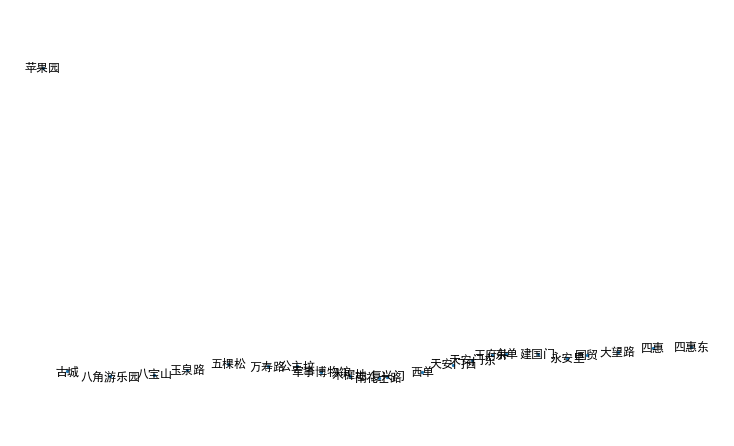

In [980]:
nx.draw(station_graph, line_1, with_labels=True, font_size = 12, node_size=5)

In [981]:
from collections import defaultdict
def build_connection(line):
    station_connection = defaultdict(list)
    station = list(line.keys())
    for c1 in station:
        for c2 in station:
            if c1 == c2 : continue
            
            if station.index(c2)-station.index(c1) == 1:
                station_connection[c1].append(c2)
    return station_connection

In [981]:
from collections import defaultdict
def build_connection_circle(line):
    station_connection = defaultdict(list)
    station = list(line.keys())
    for c1 in station:
        for c2 in station:
            if c1 == c2 : continue
            
            if station.index(c2)-station.index(c1) == 1:
                station_connection[c1].append(c2)
    return station_connection

In [1066]:
station_connection_1 = build_connection(line_1)

In [1070]:
station_connection_1

defaultdict(list,
            {'苹果园': ['古城'],
             '古城': ['八角游乐园'],
             '八角游乐园': ['八宝山'],
             '八宝山': ['玉泉路'],
             '玉泉路': ['五棵松'],
             '五棵松': ['万寿路'],
             '万寿路': ['公主坟'],
             '公主坟': ['军事博物馆'],
             '军事博物馆': ['木樨地'],
             '木樨地': ['南礼士路'],
             '南礼士路': ['复兴门'],
             '复兴门': ['西单'],
             '西单': ['天安门西'],
             '天安门西': ['天安门东'],
             '天安门东': ['王府井'],
             '王府井': ['东单'],
             '东单': ['建国门'],
             '建国门': ['永安里'],
             '永安里': ['国贸'],
             '国贸': ['大望路'],
             '大望路': ['四惠'],
             '四惠': ['四惠东']})

In [1004]:
station_connection_2 = build_connection(line_2)

In [1006]:
station_connection_2['积水潭'] = ['西直门']

In [983]:
station_connection_4 = build_connection(line_4)

In [989]:
station_connection_5 = build_connection(line_5)

In [990]:
station_connection_6 = build_connection(line_6)

In [991]:
station_connection_7 = build_connection(line_7)

In [992]:
station_connection_8 = build_connection(line_8)

In [993]:
station_connection_9 = build_connection(line_9)

In [1005]:
station_connection_10 = build_connection(line_10)

In [1007]:
station_connection_10['火器营'] = ['巴沟']

In [994]:
station_connection_13 = build_connection(line_13)

In [995]:
station_connection_14 = build_connection(line_14)

In [996]:
station_connection_15 = build_connection(line_15)

In [998]:
station_connection_batong = build_connection(line_batong)

In [999]:
station_connection_changping = build_connection(line_changping)

In [1000]:
station_connection_fangshan = build_connection(line_fangshan)

In [1001]:
station_connection_yizhuang = build_connection(line_yizhuang)

In [1002]:
station_connection_jichang = build_connection(line_jichang)

In [1108]:
import copy
station_connection_new = copy.deepcopy(station_connection_1)

In [1109]:
def build_connection(give_connection):
    for k in give_connection:
        station_connection_new[k].append(give_connection[k][0])

In [1110]:
build_connection(station_connection_2)

In [1111]:
build_connection(station_connection_4)

In [1112]:
build_connection(station_connection_5)

In [1113]:
build_connection(station_connection_6)

In [1114]:
build_connection(station_connection_7)

In [1115]:
build_connection(station_connection_8)

In [1116]:
build_connection(station_connection_9)

In [1117]:
build_connection(station_connection_10)

In [1118]:
build_connection(station_connection_13)

In [1119]:
build_connection(station_connection_14)

In [1120]:
build_connection(station_connection_15)

In [1121]:
build_connection(station_connection_batong)

In [1122]:
build_connection(station_connection_changping)

In [1123]:
build_connection(station_connection_fangshan)

In [1124]:
build_connection(station_connection_yizhuang)

In [1125]:
build_connection(station_connection_jichang)

In [1162]:
station_connection_new

defaultdict(list,
            {'苹果园': ['古城'],
             '古城': ['八角游乐园'],
             '八角游乐园': ['八宝山'],
             '八宝山': ['玉泉路'],
             '玉泉路': ['五棵松'],
             '五棵松': ['万寿路'],
             '万寿路': ['公主坟'],
             '公主坟': ['军事博物馆', '西钓鱼台'],
             '军事博物馆': ['木樨地', '北京西站'],
             '木樨地': ['南礼士路'],
             '南礼士路': ['复兴门'],
             '复兴门': ['西单', '长椿街'],
             '西单': ['天安门西', '宣武门'],
             '天安门西': ['天安门东'],
             '天安门东': ['王府井'],
             '王府井': ['东单'],
             '东单': ['建国门', '崇文门'],
             '建国门': ['永安里', '朝阳门'],
             '永安里': ['国贸'],
             '国贸': ['大望路', '双井'],
             '大望路': ['四惠', '金台路'],
             '四惠': ['四惠东', '四惠东'],
             '西直门': ['车公庄', '新街口', '大钟寺'],
             '车公庄': ['阜成门', '平安里'],
             '阜成门': ['复兴门'],
             '长椿街': ['宣武门'],
             '宣武门': ['和平门', '菜市口'],
             '和平门': ['前门'],
             '前门': ['崇文门'],
             '崇文门': ['北京站', '磁器口'],
           

In [1142]:
def get_location1_new(name,city):
        my_ak = 'MILrbpcKfwyXKEzttHc58N5GYDnfiDdl'    # 需要自己填写自己的AK
        tag = urp.quote('地铁站')
        qurey = urp.quote(name+'地铁站')
        try:
            url = 'http://api.map.baidu.com/place/v2/search?query='+qurey+'&tag='+tag+'&region='+urp.quote(city)+'&output=json&ak='+my_ak
            response = requests.get(url)
            #print(response.status_code)
            jsondata=response.text
            jsondatatopython = json.loads(jsondata)
            location = jsondatatopython['results'][0]['location']
            lnglat= (location['lng'],location['lat'])
            return lnglat
        except:
            return 0,0

In [1155]:
station_connection_new_loc = {}
for i in station_names_new:
    get = get_location1_new(i,'北京')
    station_connection_new_loc[i] = get

In [1156]:
station_connection_new_loc

{'苹果园': (116.184436, 39.932436),
 '古城': (116.197076, 39.913414),
 '八角游乐园': (116.219395, 39.913076),
 '八宝山': (116.2424, 39.913187),
 '玉泉路': (116.259475, 39.913501),
 '五棵松': (116.280661, 39.913834),
 '万寿路': (116.301384, 39.913711),
 '公主坟': (116.316746, 39.913701),
 '军事博物馆': (116.329311, 39.913343),
 '木樨地': (116.3441, 39.913125),
 '南礼士路': (116.359177, 39.912979),
 '复兴门': (116.36376, 39.913025),
 '西单': (116.381905, 39.913327),
 '天安门西': (116.398036, 39.913776),
 '天安门东': (116.407913, 39.914082),
 '王府井': (116.418017, 39.914402),
 '东单': (116.425374, 39.914503),
 '建国门': (116.44195, 39.914505),
 '永安里': (116.457086, 39.914223),
 '国贸': (116.467328, 39.914437),
 '大望路': (116.483555, 39.914614),
 '四惠': (116.502033, 39.914861),
 '四惠东': (116.521965, 39.914941),
 '西直门': (116.361446, 39.946471),
 '车公庄': (116.361887, 39.938351),
 '阜成门': (116.362817, 39.929522),
 '长椿街': (116.369911, 39.90534),
 '宣武门': (116.380848, 39.905881),
 '和平门': (116.390619, 39.906362),
 '前门': (116.404276, 39.906534),
 '崇文门': (116.424

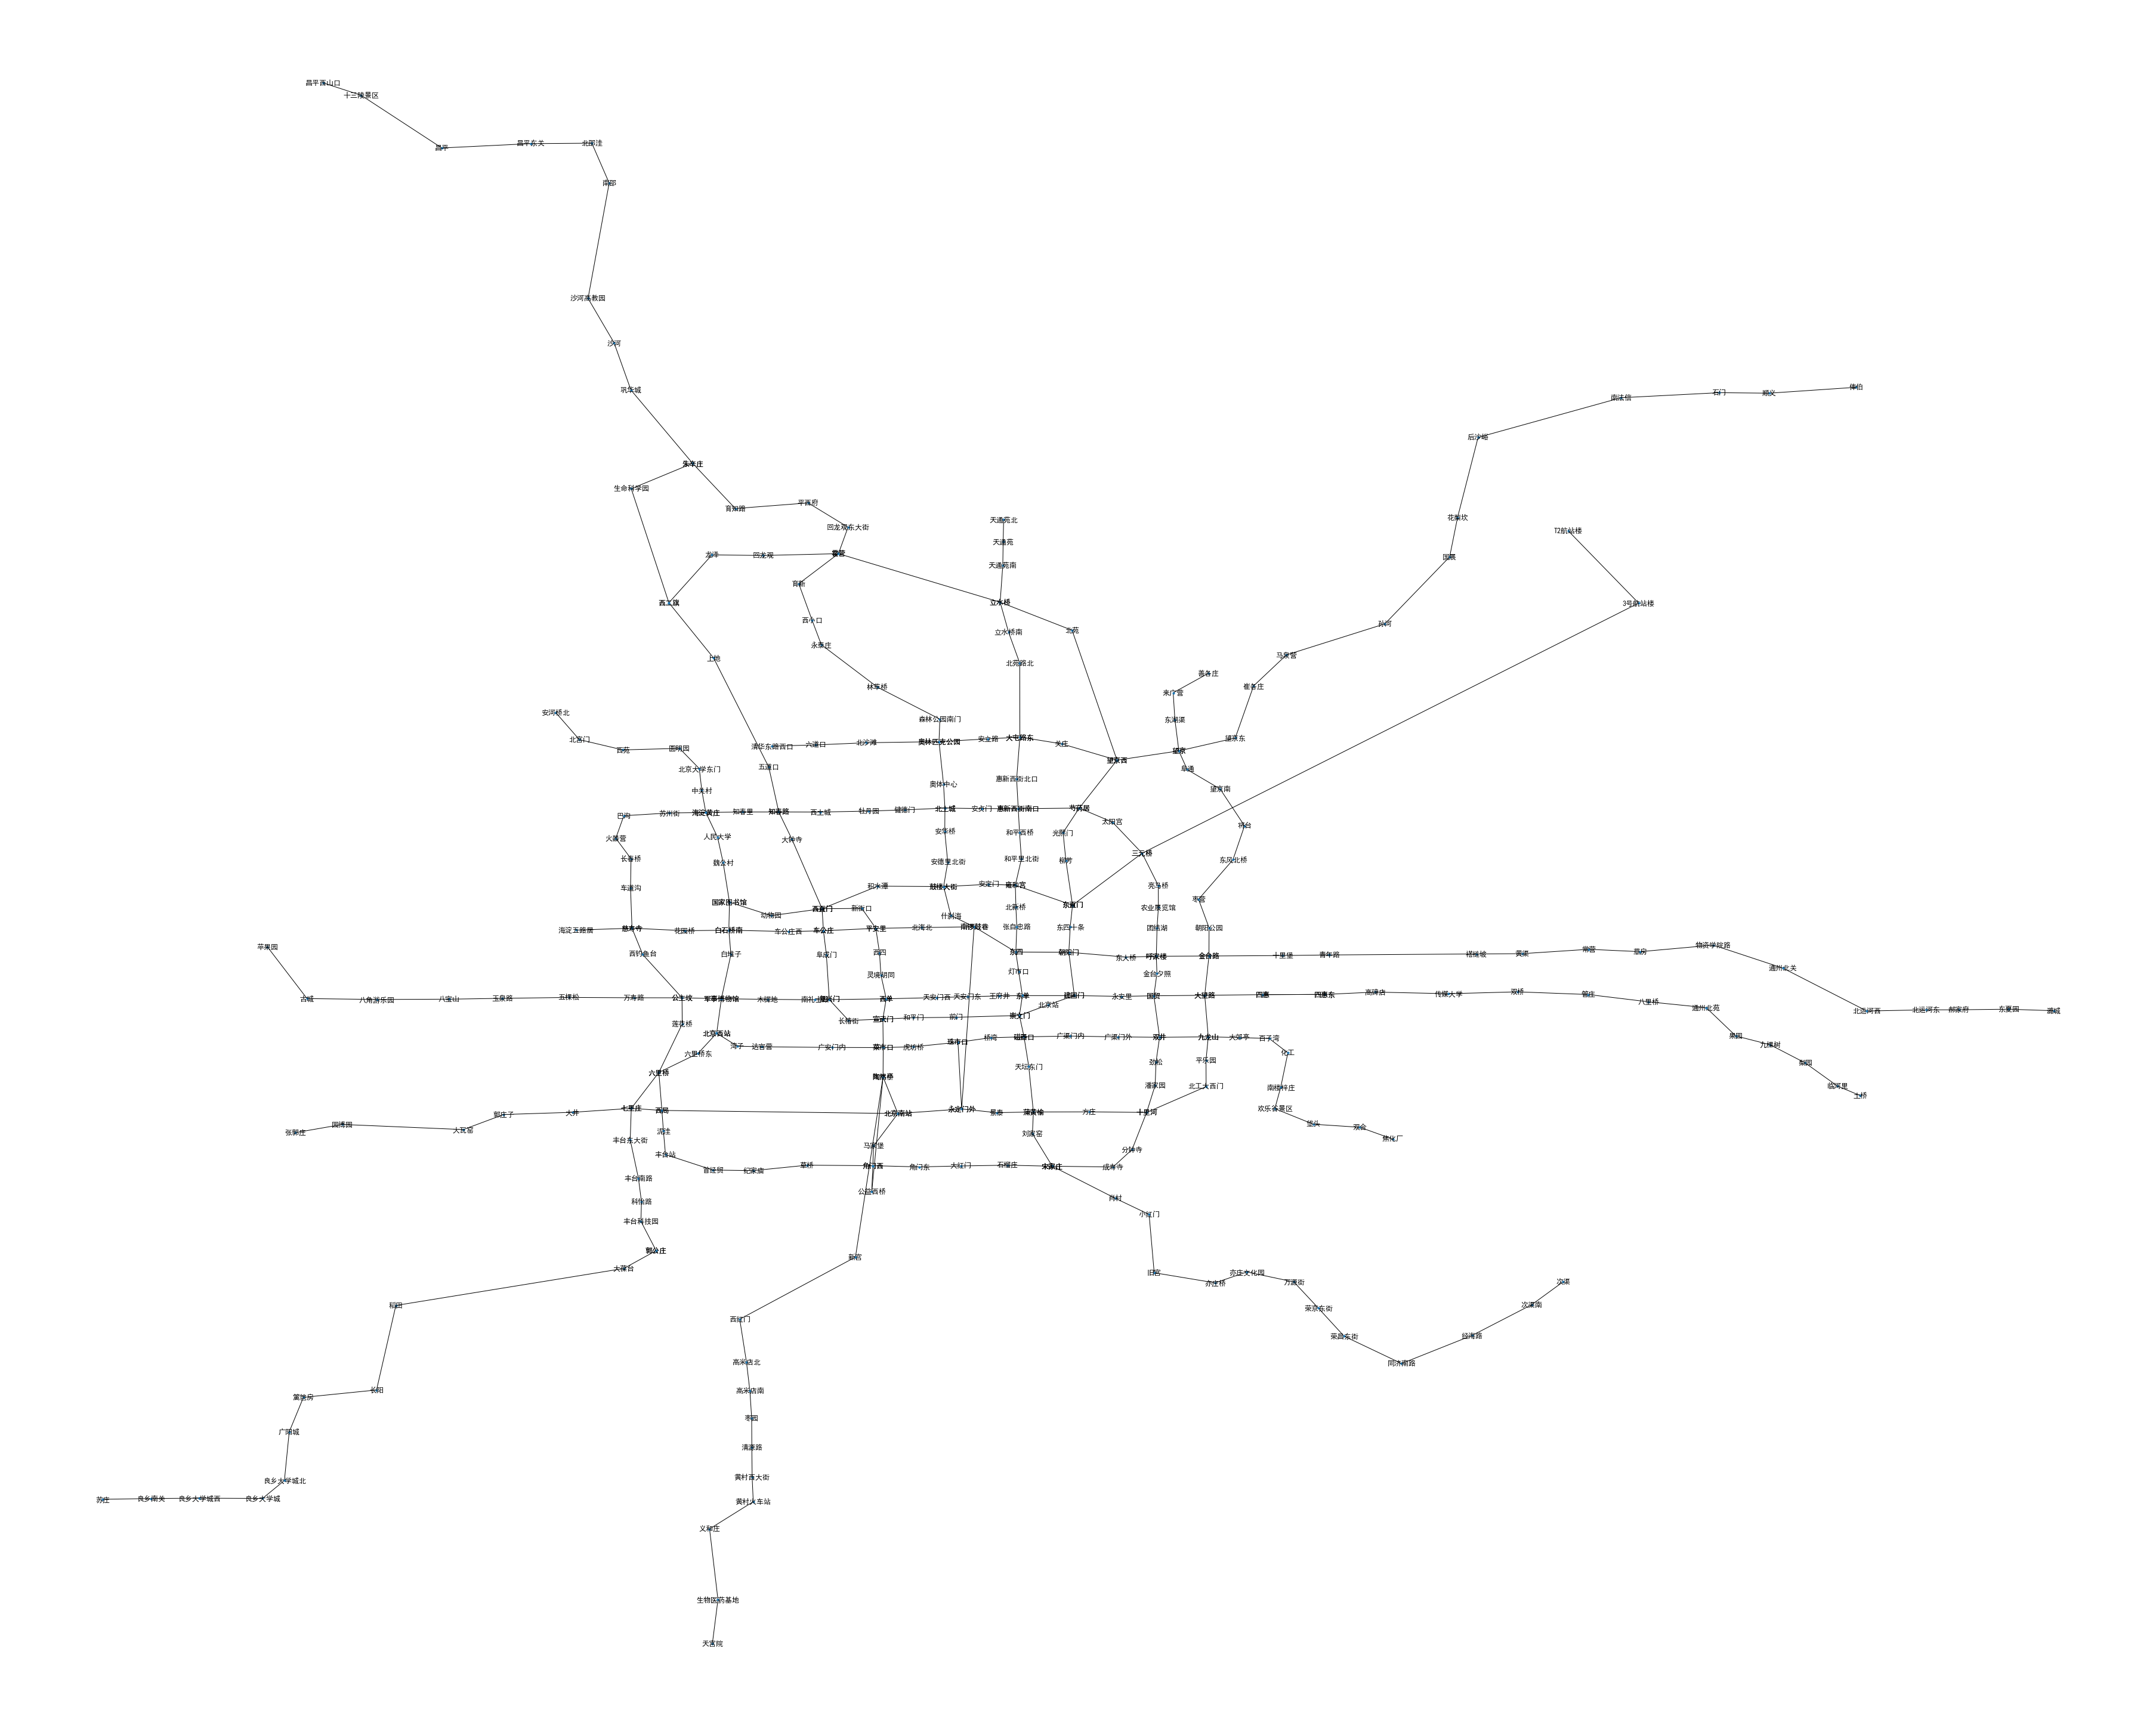

In [1069]:
nx.draw(nx.Graph(station_connection_1),line_1,with_labels = True, node_size = 10)
nx.draw(nx.Graph(station_connection_2),line_2,with_labels = True, node_size = 10)
nx.draw(nx.Graph(station_connection_4),line_4,with_labels = True, node_size = 10)
nx.draw(nx.Graph(station_connection_5),line_5,with_labels = True, node_size = 10)
nx.draw(nx.Graph(station_connection_6),line_6,with_labels = True, node_size = 10)
nx.draw(nx.Graph(station_connection_7),line_7,with_labels = True, node_size = 10)
nx.draw(nx.Graph(station_connection_8),line_8,with_labels = True, node_size = 10)
nx.draw(nx.Graph(station_connection_9),line_9,with_labels = True, node_size = 10)
nx.draw(nx.Graph(station_connection_10),line_10,with_labels = True, node_size = 10)
nx.draw(nx.Graph(station_connection_13),line_13,with_labels = True, node_size = 10)
nx.draw(nx.Graph(station_connection_14),line_14,with_labels = True, node_size = 10)
nx.draw(nx.Graph(station_connection_15),line_15,with_labels = True, node_size = 10)
nx.draw(nx.Graph(station_connection_batong),line_batong,with_labels = True, node_size = 10)
nx.draw(nx.Graph(station_connection_changping),line_changping,with_labels = True, node_size = 10)
nx.draw(nx.Graph(station_connection_fangshan),line_fangshan,with_labels = True, node_size = 10)
nx.draw(nx.Graph(station_connection_yizhuang),line_yizhuang,with_labels = True, node_size = 10)
nx.draw(nx.Graph(station_connection_jichang),line_jichang,with_labels = True, node_size = 10)

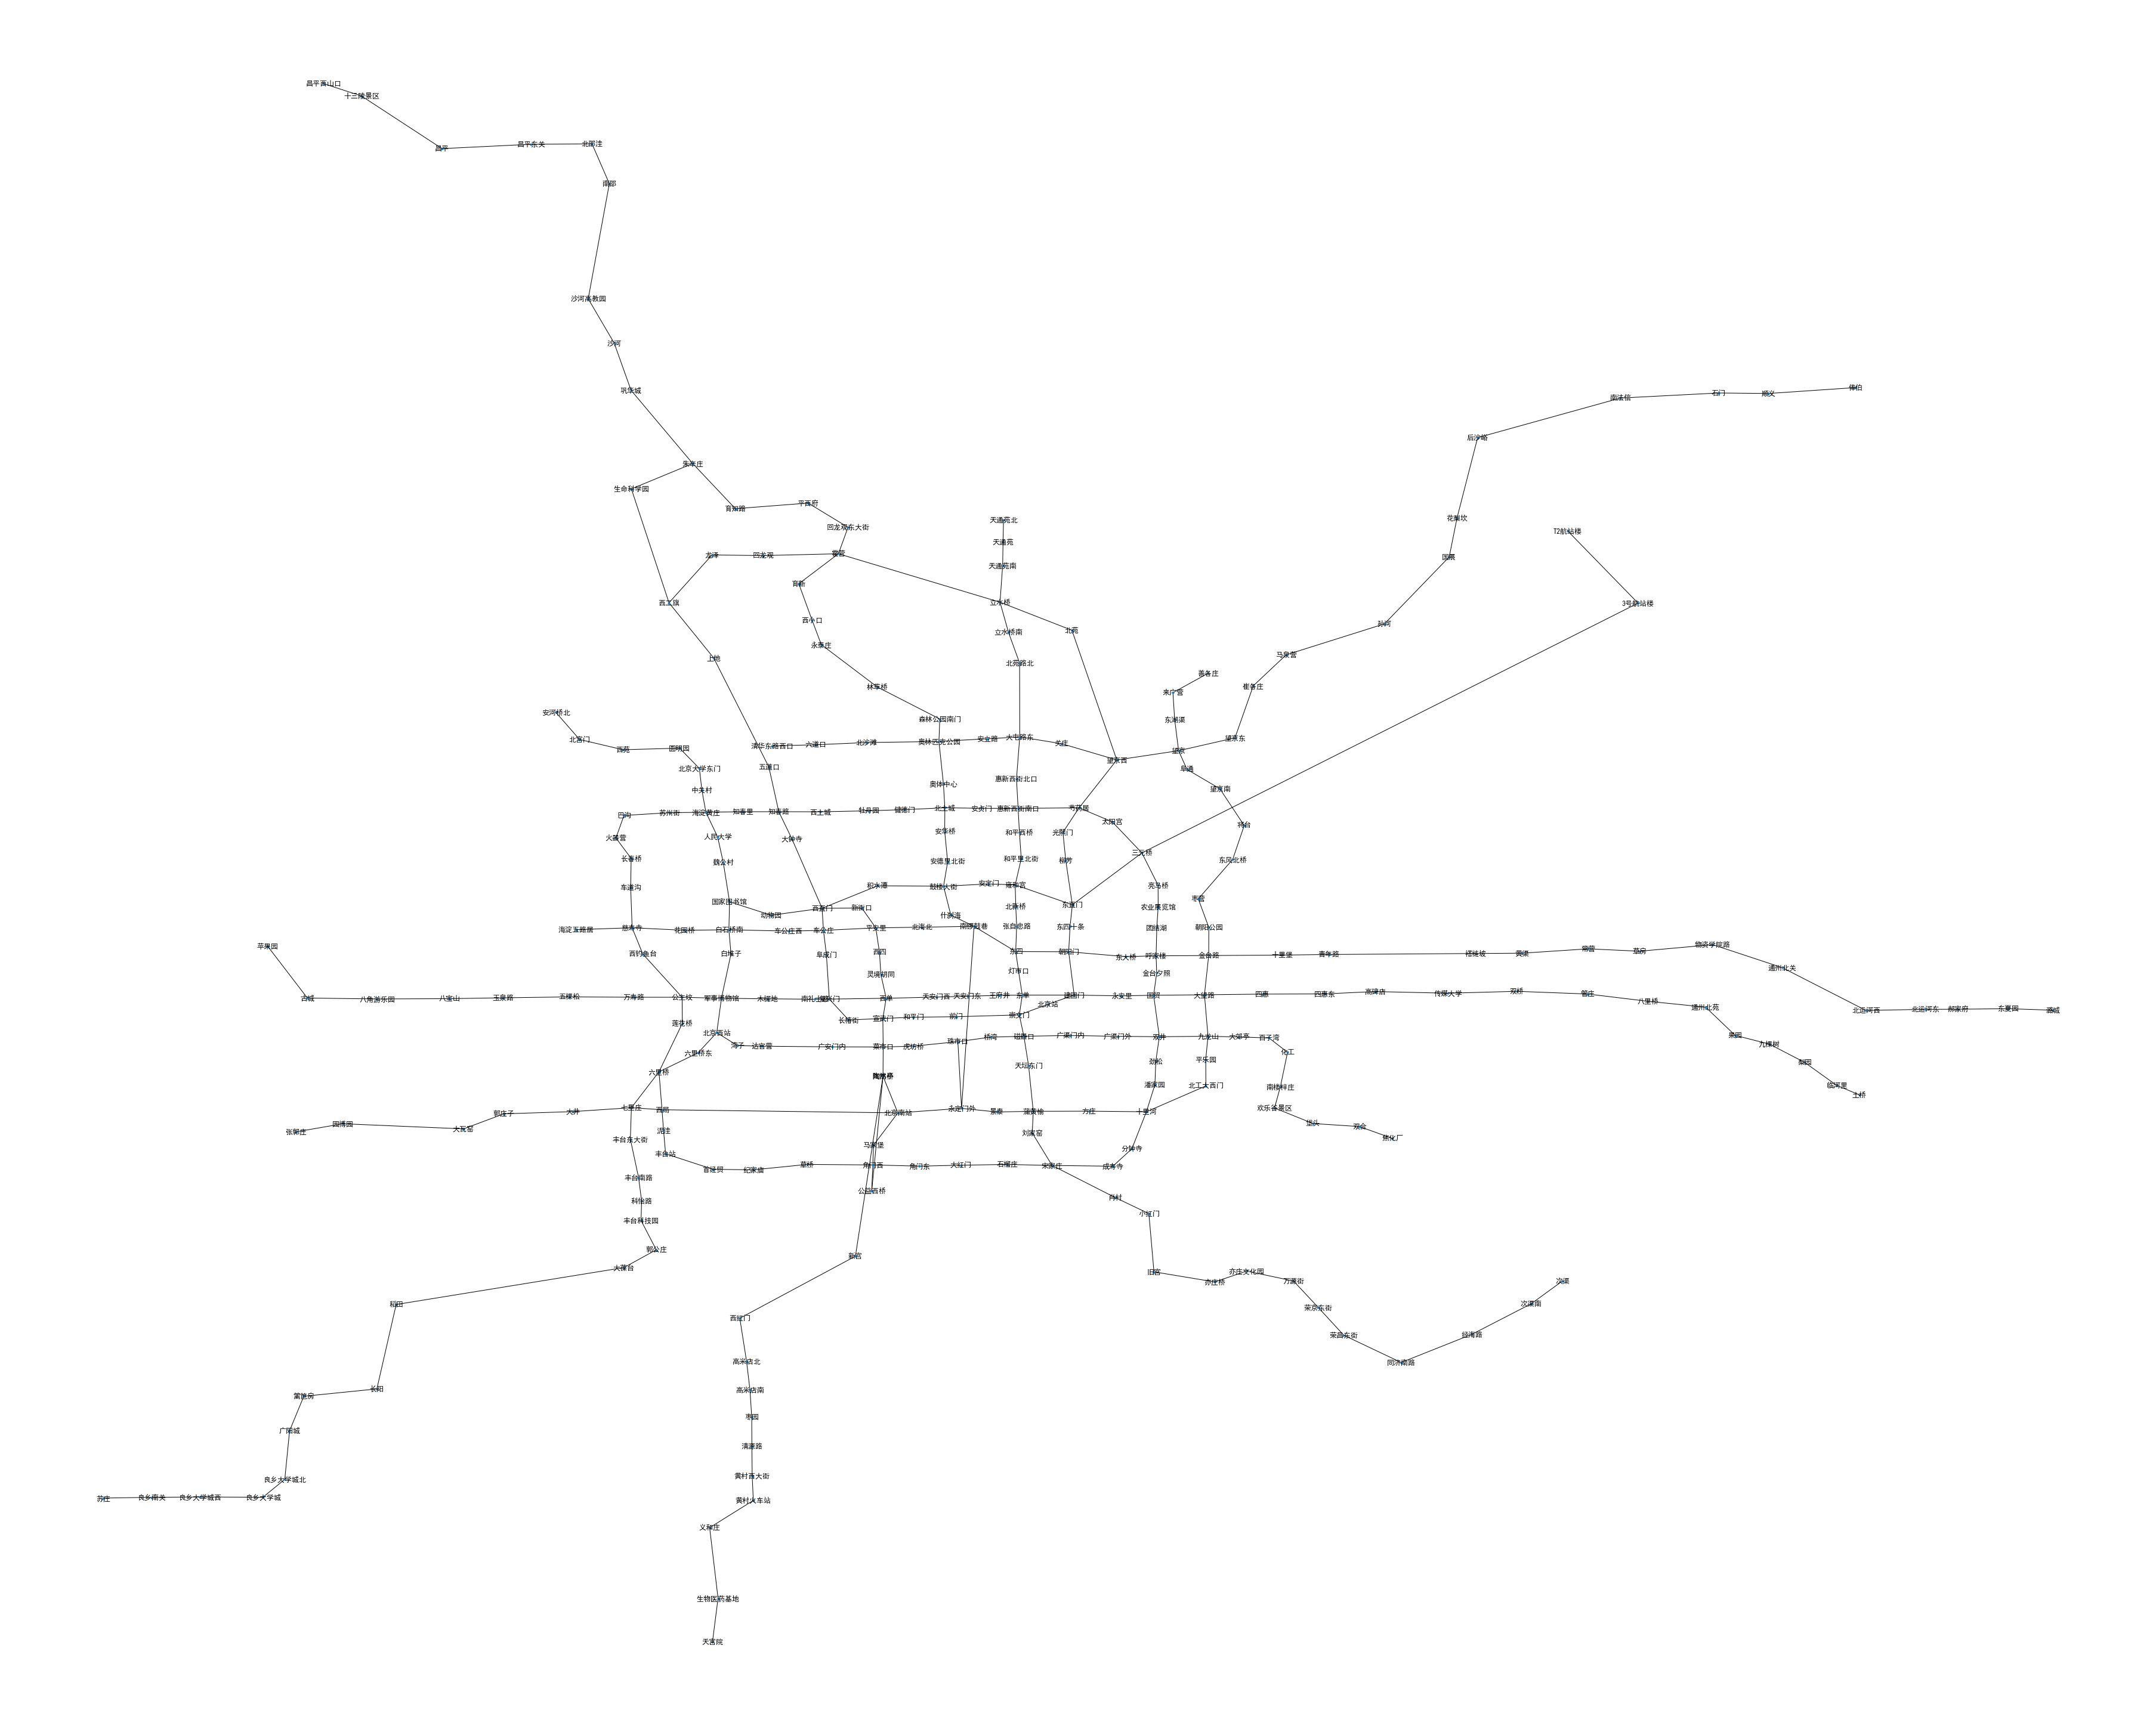

In [1157]:
nx.draw(nx.Graph(station_connection_new),station_connection_new_loc,with_labels = True, node_size = 10)

In [1158]:
def search(graph,start,destination):
    pathes = [[start]]  # list 用来存储待搜索路径
    visited = set() # set用来存储已搜索的节点
    
    while pathes:
        path = pathes.pop(0)  #提取第一条路径
        froniter = path[-1]   #提取即将要探索的节点
        if froniter in visited: continue  #检查如果该点已经探索过 则不用再探索
        successsors = graph[froniter]
        
        for city in successsors:      #遍历子节点
            if city in path: continue  # check loop #检查会不会形成环
            new_path = path+[city]
            pathes.append(new_path)  #bfs     #将新路径加到list里面
            #pathes = [new_path] + pathes #dfs
            
            if city == destination:  #检查目的地是不是已经搜索到了
                return new_path
        visited.add(froniter)

for example, if you use Beijing subway graoh, and you run:

In [1161]:
search(nx.Graph(station_connection_new),"五道口","王府井")

['五道口', '知春路', '大钟寺', '西直门', '车公庄', '阜成门', '复兴门', '西单', '天安门西', '天安门东', '王府井']

\>>> search("奥体中心“，”天安门“）

You should get the result as follows: 奥体中心 -> A ->B ->C ... -> 天安门

教训：考虑更换网站爬取最新地铁站点信息，考虑存储数据用datafram存储

### (Optional) Improve your agent to make it able to find a path based on different strategies

###  <评阅点> : 是否正确得到不同目标下的路径。

Some ideas you might want to try:

a. Find the shortest path between two stations.

b. Find the path that requires minimum transfers between two stations.

c. Combine the previous two ideas, find a more suitable path.

Compare your results with results obtained by using some apps such as Baidu map, A map, Google map or Apple map. If there is difference, try to explanate it.

## Congratulations ! You have finished the assignment of week 2.

![title](img/agent.png)

### If you have any suggestions regarding the teaching, please feel free to send them to my eamil (eric.lee.xiao@gmail.com) 